<div style="text-align: center; background-color:  maroon; color: white; font-weight: bold; font-size: 24px; padding: 20px; min-height: 50px; min-width: 100px; border-radius: 20px;">
    ReneWind
   
</div>


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Problem Statement
   
</div>


### Context 

Renewable energy sources play an important role in the global energy mix, aiming to reduce the environmental impact of energy production.

Among renewable energy options, wind energy is one of the most developed. The U.S. Department of Energy has provided a guide to achieving operational efficiency using predictive maintenance.

Predictive maintenance uses sensor data and analysis to measure and predict degradation and component capability. The idea is that if failure patterns can be predicted and the component replaced before failure, operational and maintenance costs will be lower.

Sensors in energy generation machines collect data on environmental factors (temperature, humidity, wind speed, etc.) and features related to wind turbine components (gearbox, tower, blades, brake, etc.).



### Objective


**ReneWind** is working on improving processes in wind energy production using machine learning. They have collected data on wind turbine generator failures using sensors. A ciphered version of this data was shared due to confidentiality.  
- The dataset includes 40 predictors, 20,000 training observations, and 5,000 test observations.

The goal is to build and tune classification models to find the best one that identifies failures early, so generators can be repaired before breaking down, reducing maintenance cost.

#### Prediction Outcomes:

- **True Positives (TP)**: Failures correctly predicted → _Repair cost_
- **False Negatives (FN)**: Actual failures missed → _Replacement cost_
- **False Positives (FP)**: Incorrectly predicted failures → _Inspection cost_

The cost of repair is lower than replacement, and inspection cost is lower than repair.

#### Target Variable:

- `1` → **Failure**  
- `0` → **No Failure**

<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
 Project Rubric
   
</div>




### 📊 Exploratory Data Analysis (EDA) - **5 Points**
- Data Overview  
- Univariate Analysis  
- Bivariate Analysis  

---

### 🧹 Data Preprocessing - **4 Points**
- Prepare the data for modeling  
- Missing Value Treatment  
- Ensure there's no data leakage  

---

### 🧠 Model Building - **6 Points**
- Choose the metric of choice with a rationale  
- Build a Neural Network model with **SGD** as the optimizer  
- Comment on model performance  

---

### 🚀 Model Performance Improvement & Final Model Selection - **34 Points**
- Use combinations (at least 6) of different methods to improve model performance:
  - More hidden layers  
  - Different optimizers (**SGD**, **Adam**)  
  - Dropout  
  - Class Weights  
- Comment on model performance for each of the models  
- Choose the **best model** with proper reasoning  

---

### 💡 Actionable Insights & Recommendations - **3 Points**
- Conclude with key takeaways and recommendations for the business  

---

### 📔 Notebook Overall Quality - **8 Points**
- Structure and flow  
- Well-commented code  
- Conclusion and Business Recommendations  


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Data Dictionary
   
</div>


The data provided is a transformed version of the original data which was collected using sensors.

- **Train.csv** – To be used for training and tuning of models.
- **Test.csv** – To be used only for testing the performance of the final best model.

> Both datasets consist of **40 predictor variables** and **1 target variable**.


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Import Libraries
   
</div>

In [1]:
## 📚 Import Libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import Normalize

# Preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import BinaryCrossentropy
# To be used for missing value imputation
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import Recall
from sklearn.inspection import permutation_importance
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    precision_recall_curve,
    auc,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

In [2]:
import warnings
warnings.filterwarnings("ignore")

<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Reading input File
   
</div>


In [3]:
# Load data
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Data Overview
   
</div>


In [4]:
print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)

Train Shape: (20000, 41)
Test Shape: (5000, 41)


In [5]:
print("\nTrain Head:")
train_df.head()


Train Head:


V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10  ...       V32       V33        V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296  2.235198   
1 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514  1.894599   
2 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219  2.292138   
3 -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769  0.622714   
4  4.848994 -1.854920 -6.220023  ...  8.265896  6.629213 -10.068689  1.222987   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
2  5.360850  0.351993  2.940021  3.839160 -4.309402       0  
3  5.550100 -1.526796  0.138853  3.101430 -1.277378       0  
4 -3.229763  1.686909 -2.163896 -3.644622  6.510338       0  

[5 rows x 41 columns]

In [6]:
print("\nTest Head:")
test_df.head()


Test Head:


V1        V2        V3        V4        V5        V6        V7  \
0 -0.613489 -3.819640  2.202302  1.300420 -1.184929 -4.495964 -1.835817   
1  0.389608 -0.512341  0.527053 -2.576776 -1.016766  2.235112 -0.441301   
2 -0.874861 -0.640632  4.084202 -1.590454  0.525855 -1.957592 -0.695367   
3  0.238384  1.458607  4.014528  2.534478  1.196987 -3.117330 -0.924035   
4  5.828225  2.768260 -1.234530  2.809264 -1.641648 -1.406698  0.568643   

         V8        V9       V10  ...       V32       V33       V34       V35  \
0  4.722989  1.206140 -0.341909  ...  2.291204 -5.411388  0.870073  0.574479   
1 -4.405744 -0.332869  1.966794  ... -2.474936  2.493582  0.315165  2.059288   
2  1.347309 -1.732348  0.466500  ... -1.318888 -2.997464  0.459664  0.619774   
3  0.269493  1.322436  0.702345  ...  3.517918 -3.074085 -0.284220  0.954576   
4  0.965043  1.918379 -2.774855  ...  1.773841 -1.501573 -2.226702  4.776830   

        V36       V37        V38       V39       V40  Target  
0  4.157191  1.428093 -10.511342  0.454664 -1.448363       0  
1  0.683859 -0.485452   5.128350  1.720744 -1.488235       0  
2  5.631504  1.323512  -1.752154  1.808302  1.675748       0  
3  3.029331 -1.367198  -3.412140  0.906000 -2.450889       0  
4 -6.559698 -0.805551  -0.276007 -3.858207 -0.537694       0  

[5 rows x 41 columns]

In [7]:
# Looking at the statistical summary of all variables
train_df.describe(include='all')

V1            V2            V3            V4            V5  \
count  19982.000000  19982.000000  20000.000000  20000.000000  20000.000000   
mean      -0.271996      0.440430      2.484699     -0.083152     -0.053752   
std        3.441625      3.150784      3.388963      3.431595      2.104801   
min      -11.876451    -12.319951    -10.708139    -15.082052     -8.603361   
25%       -2.737146     -1.640674      0.206860     -2.347660     -1.535607   
50%       -0.747917      0.471536      2.255786     -0.135241     -0.101952   
75%        1.840112      2.543967      4.566165      2.130615      1.340480   
max       15.493002     13.089269     17.090919     13.236381      8.133797   

                 V6            V7            V8            V9           V10  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean      -0.995443     -0.879325     -0.548195     -0.016808     -0.012998   
std        2.040970      1.761626      3.295756      2.160568      2.193201   
min      -10.227147     -7.949681    -15.657561     -8.596313     -9.853957   
25%       -2.347238     -2.030926     -2.642665     -1.494973     -1.411212   
50%       -1.000515     -0.917179     -0.389085     -0.067597      0.100973   
75%        0.380330      0.223695      1.722965      1.409203      1.477045   
max        6.975847      8.006091     11.679495      8.137580      8.108472   

       ...           V32           V33           V34           V35  \
count  ...  20000.000000  20000.000000  20000.000000  20000.000000   
mean   ...      0.303799      0.049825     -0.462702      2.229620   
std    ...      5.500400      3.575285      3.183841      2.937102   
min    ...    -19.876502    -16.898353    -17.985094    -15.349803   
25%    ...     -3.420469     -2.242857     -2.136984      0.336191   
50%    ...      0.052073     -0.066249     -0.255008      2.098633   
75%    ...      3.761722      2.255134      1.436935      4.064358   
max    ...     23.633187     16.692486     14.358213     15.291065   

                V36           V37           V38           V39           V40  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       1.514809      0.011316     -0.344025      0.890653     -0.875630   
std        3.800860      1.788165      3.948147      1.753054      3.012155   
min      -14.833178     -5.478350    -17.375002     -6.438880    -11.023935   
25%       -0.943809     -1.255819     -2.987638     -0.272250     -2.940193   
50%        1.566526     -0.128435     -0.316849      0.919261     -0.920806   
75%        3.983939      1.175533      2.279399      2.057540      1.119897   
max       19.329576      7.467006     15.289923      7.759877     10.654265   

             Target  
count  20000.000000  
mean       0.055500  
std        0.228959  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 41 columns]

In [8]:
# Checking the data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

### 📊 Data Structure Overview

- The training dataset consists of **20,000 entries** and **41 columns**.
- There are **40 independent features** (`V1` to `V40`), all of type `float64`, suggesting they represent continuous sensor readings or engineered numeric values.
- The **target variable** is labeled as `Target` and is of type `int64`, with values likely being `0` (No Failure) or `1` (Failure), confirming this is a **binary classification problem**.
- All features except `V1` have **no missing values**, while `V1` has **19998 non-null entries**, indicating just **2 missing values**, which will need to be handled during preprocessing.

✅ This step ensures the dataset schema is well-understood before proceeding with analysis, imputation, or modeling.


In [9]:
# Checking for missing values
train_df.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

### 🧪 Missing Value Check

- A check for missing values in the training dataset revealed that **only one feature (`V2`) contains null values**, with exactly **18 missing entries**.
- All other features (`V3` to `V40`) and the target variable are **fully populated**, containing **no missing values**.
- Since the dataset is otherwise complete, a **targeted imputation strategy** (e.g., median or mean imputation) for `V2` is sufficient and avoids unnecessary modifications to other columns.

✅ This confirms the dataset is largely clean and only requires minor imputation before model training.


In [10]:
# Checking for duplicated values
train_df.duplicated().sum()

0

### 🧹 Data Quality Checks

- ✅ **No duplicate rows** were found in the training dataset (`train_df`), confirming that the data is clean and free from redundancy.



In [11]:
# Checking for missing values
test_df.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

### 🧪 Missing Value Check

- 🔍 A check for missing values in the test dataset (`test_df`) revealed:
  - **5 missing values in `V1`**
  - **6 missing values in `V2`**
- All other features, including the target column, are **fully complete** with no null entries.

📌 These missing values in `V1` and `V2` can be addressed using imputation (e.g., median strategy) to ensure consistency across training and test data.

✅ These checks ensure both **data integrity** and **model reliability**, preventing unintended behavior during inference.

In [12]:
# Checking for duplicated values
test_df.duplicated().sum()

0

### 🧹 Data Quality Checks

- ✅ **No duplicate rows** were found in the testing dataset (`test_df`), confirming that the data is clean and free from redundancy.



<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Exploratory Data Analysis (EDA)
   
</div>


### Univariate Analysis

In [13]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

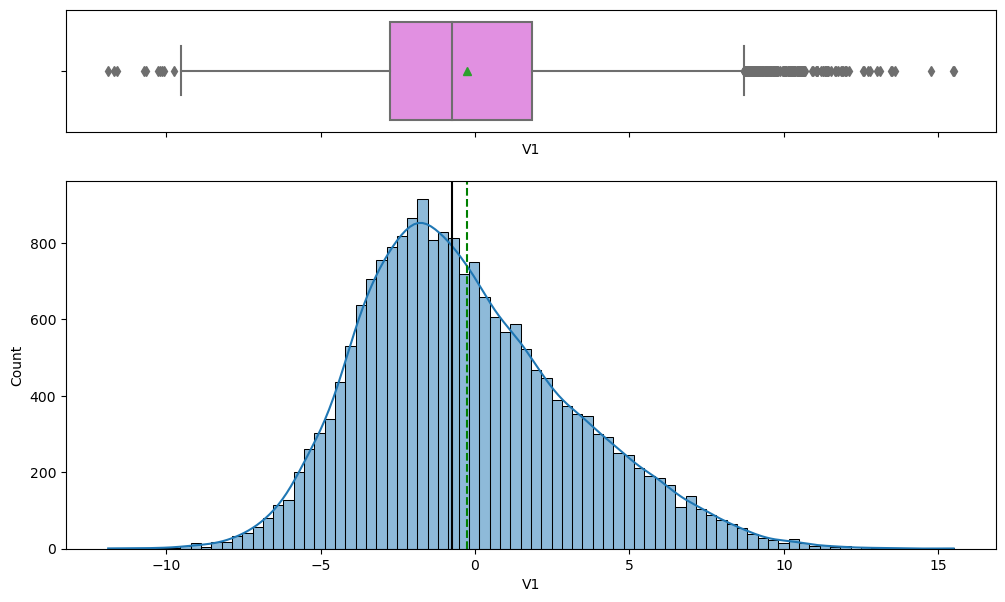

In [14]:
histogram_boxplot(train_df, "V1", figsize=(12, 7), kde=True, bins=None)

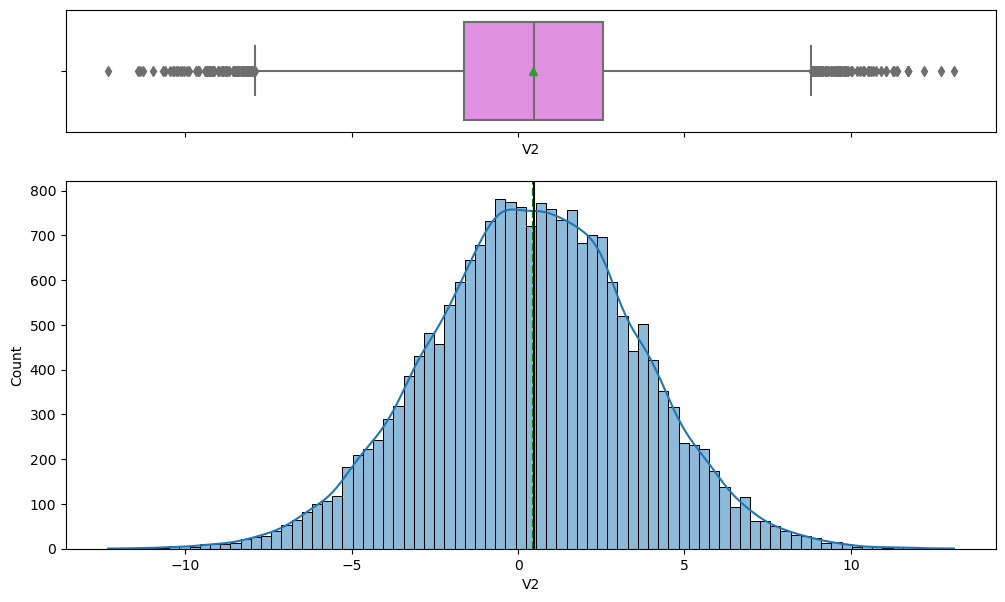

In [15]:
histogram_boxplot(train_df, "V2", figsize=(12, 7), kde=True, bins=None)

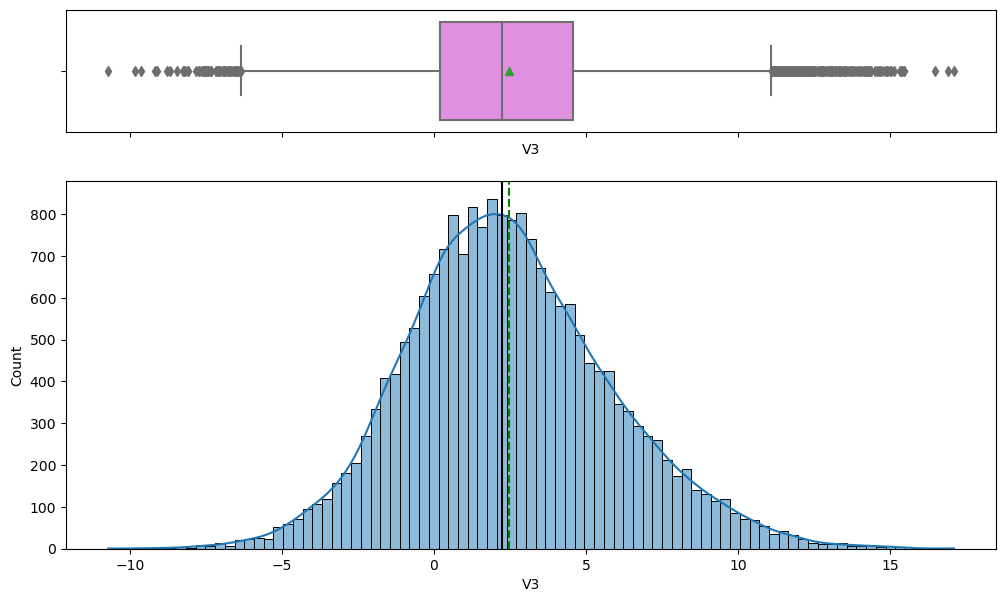

In [16]:
histogram_boxplot(train_df, "V3", figsize=(12, 7), kde=True, bins=None)

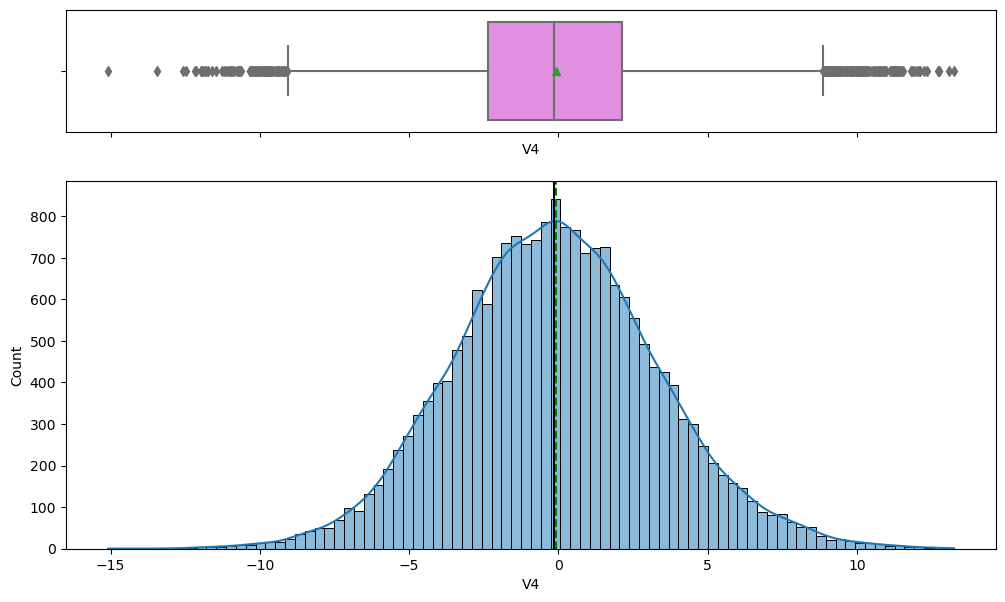

In [17]:
histogram_boxplot(train_df, "V4", figsize=(12, 7), kde=True, bins=None)

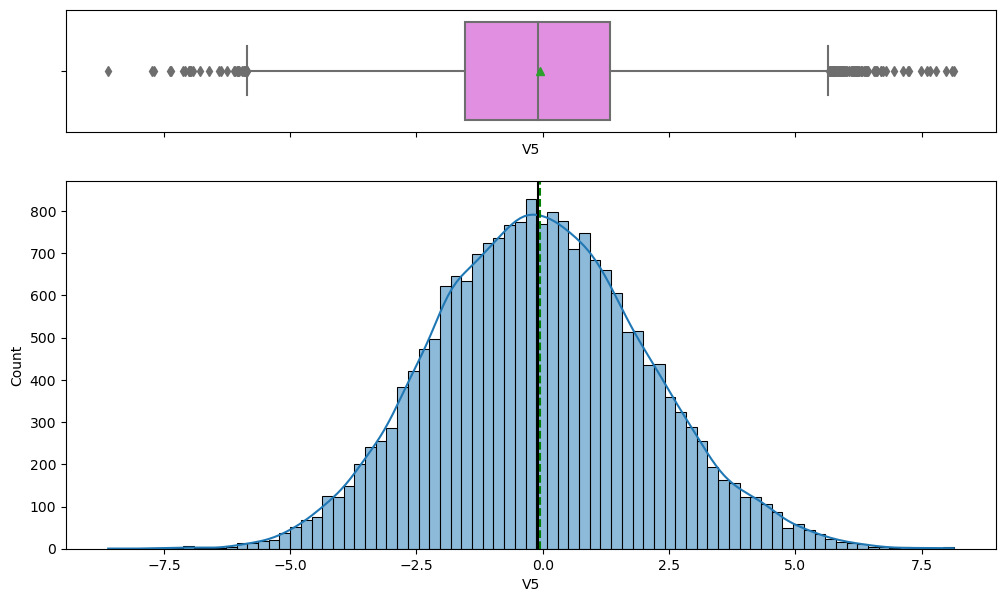

In [18]:
histogram_boxplot(train_df, "V5", figsize=(12, 7), kde=True, bins=None)

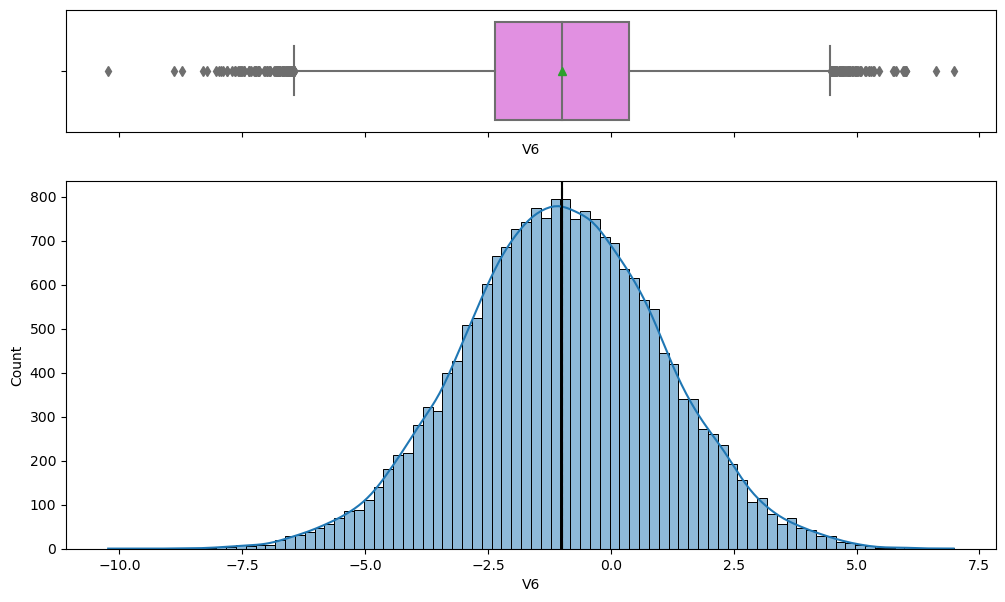

In [19]:
histogram_boxplot(train_df, "V6", figsize=(12, 7), kde=True, bins=None)

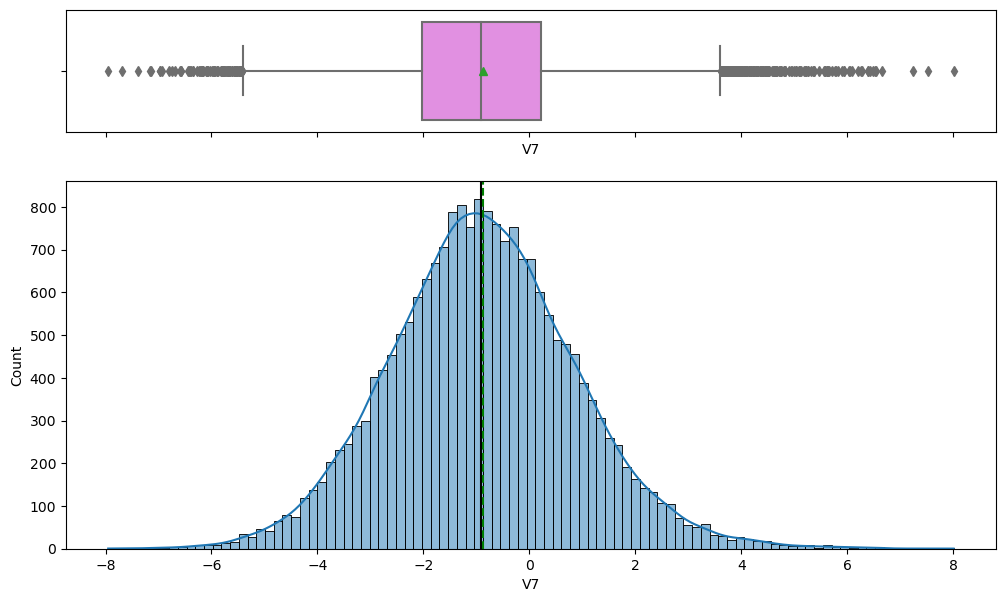

In [20]:
histogram_boxplot(train_df, "V7", figsize=(12, 7), kde=True, bins=None)

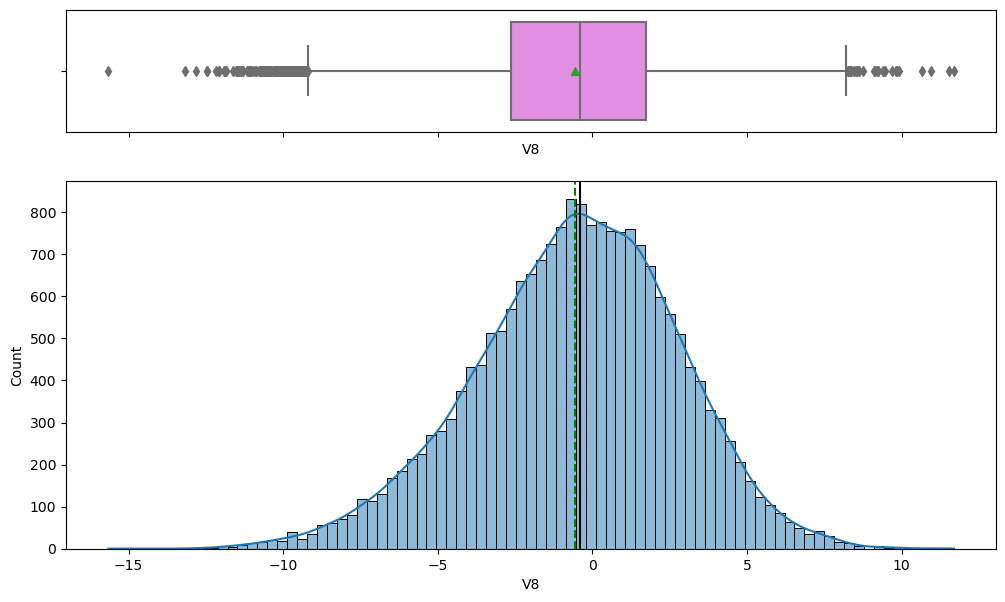

In [21]:
histogram_boxplot(train_df, "V8", figsize=(12, 7), kde=True, bins=None)

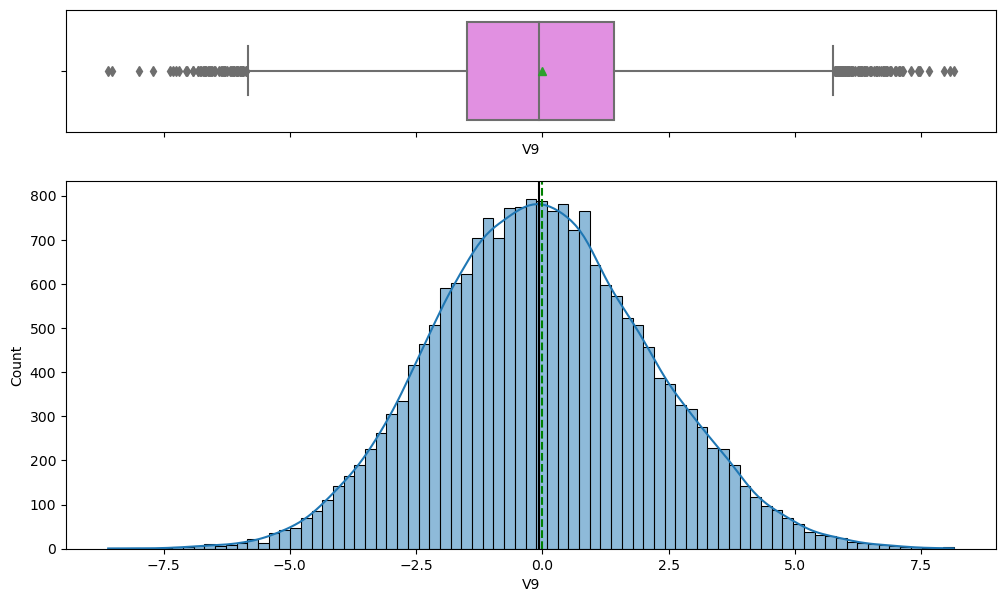

In [22]:
histogram_boxplot(train_df, "V9", figsize=(12, 7), kde=True, bins=None)

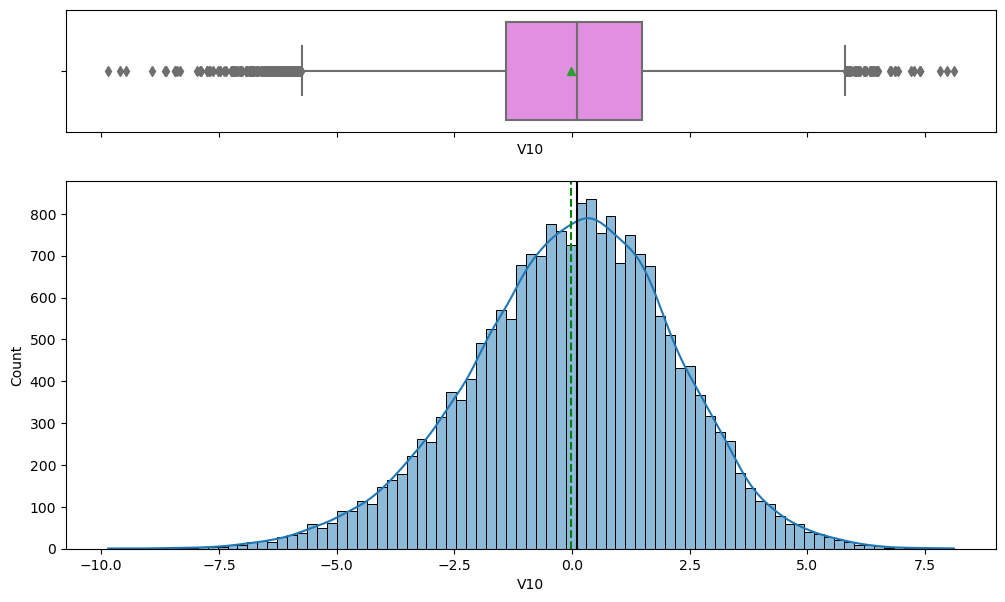

In [23]:
histogram_boxplot(train_df, "V10", figsize=(12, 7), kde=True, bins=None)

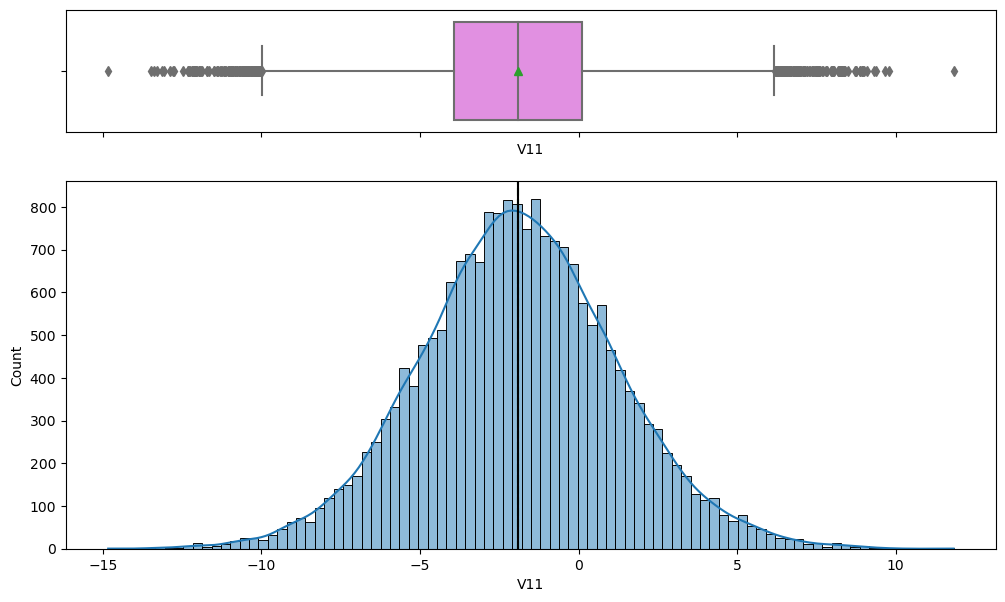

In [24]:
histogram_boxplot(train_df, "V11", figsize=(12, 7), kde=True, bins=None)

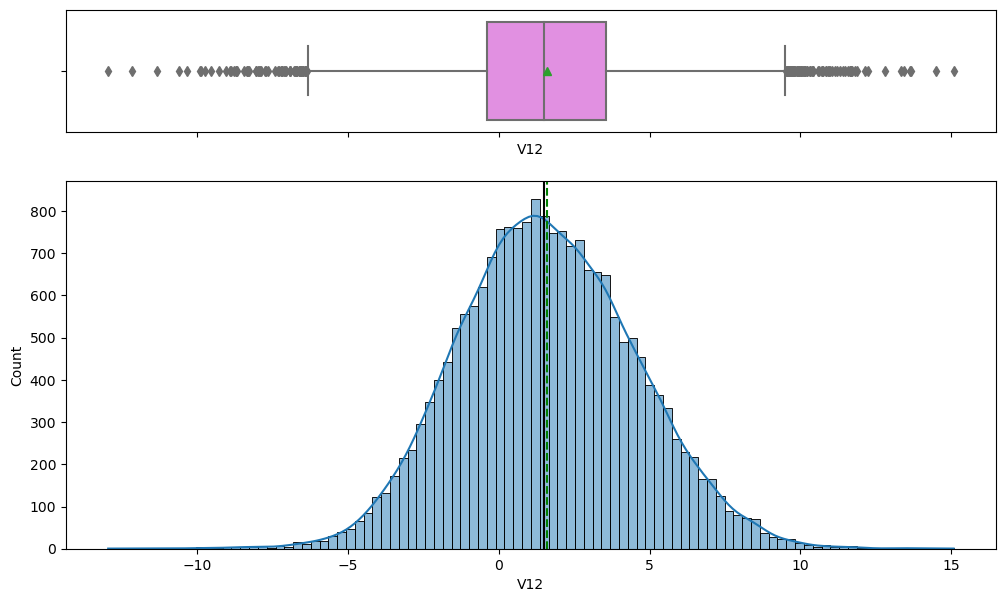

In [25]:
histogram_boxplot(train_df, "V12", figsize=(12, 7), kde=True, bins=None)

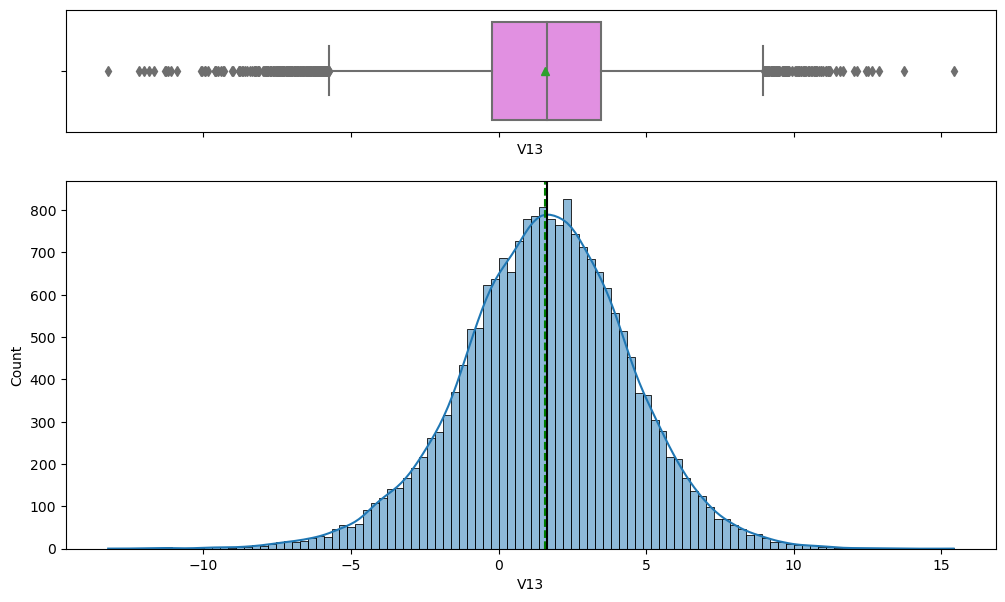

In [26]:
histogram_boxplot(train_df, "V13", figsize=(12, 7), kde=True, bins=None)

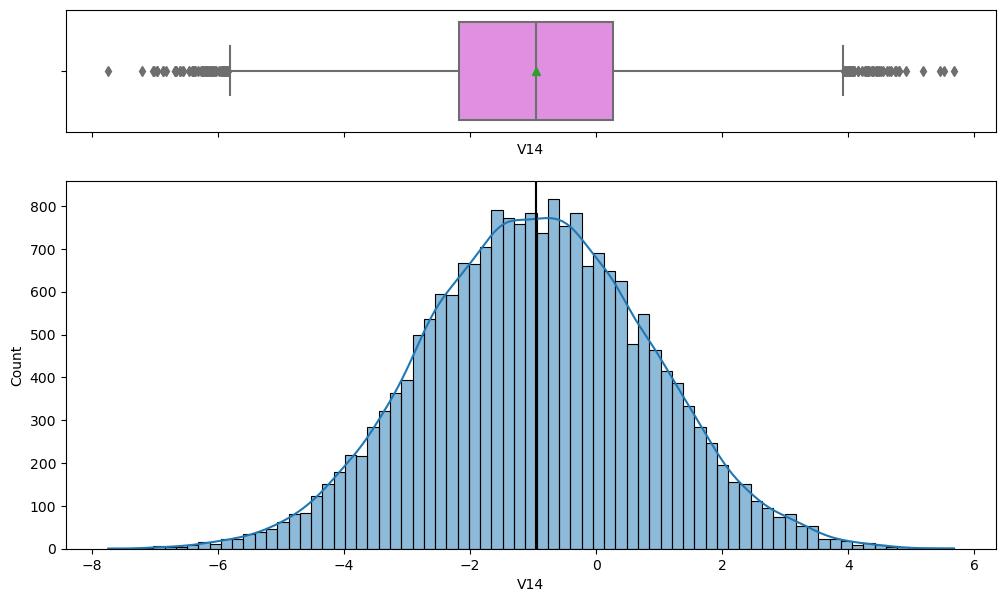

In [27]:
histogram_boxplot(train_df, "V14", figsize=(12, 7), kde=True, bins=None)

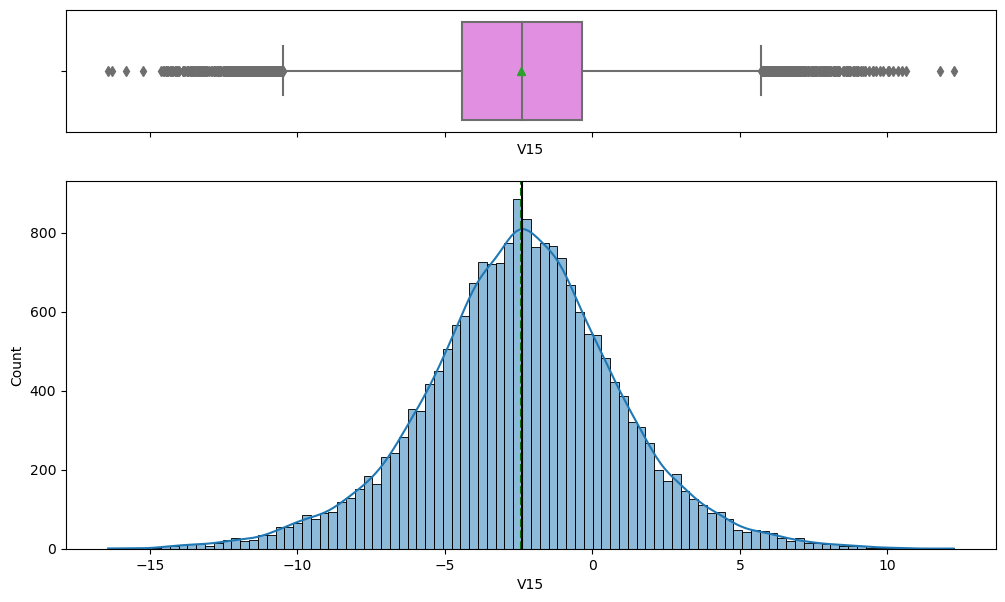

In [28]:
histogram_boxplot(train_df, "V15", figsize=(12, 7), kde=True, bins=None)

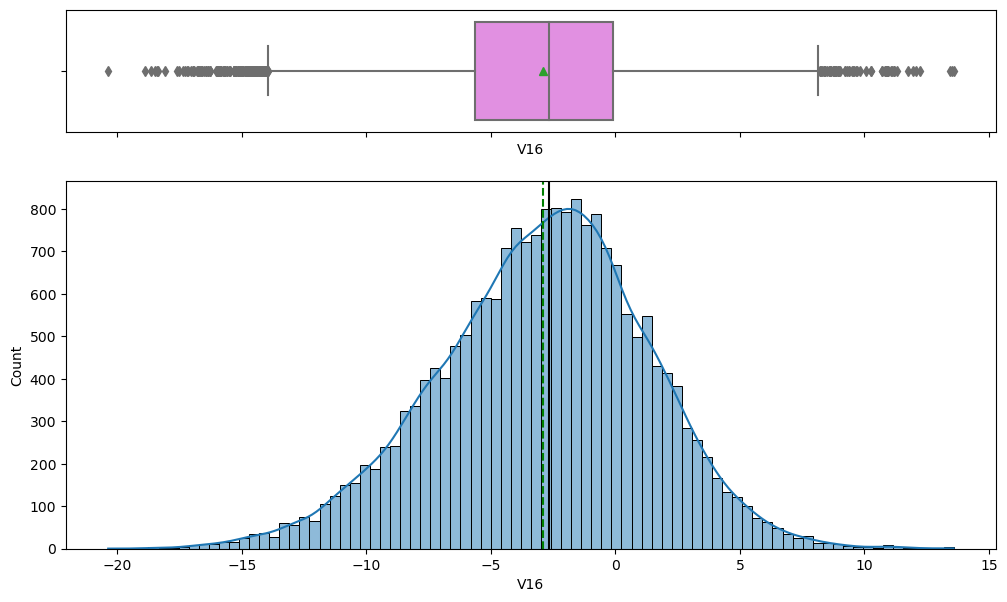

In [29]:
histogram_boxplot(train_df, "V16", figsize=(12, 7), kde=True, bins=None)

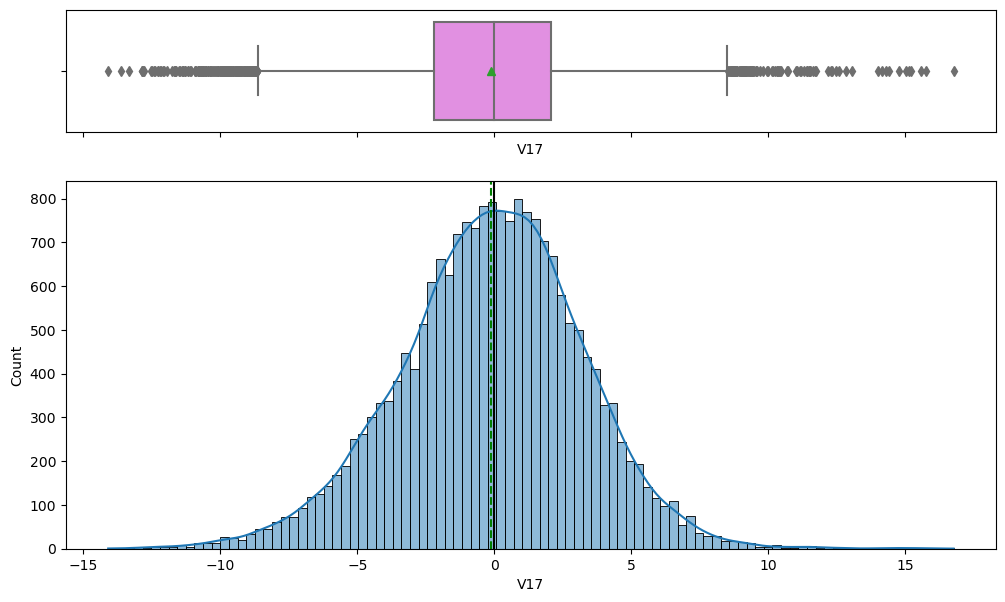

In [30]:
histogram_boxplot(train_df, "V17", figsize=(12, 7), kde=True, bins=None)

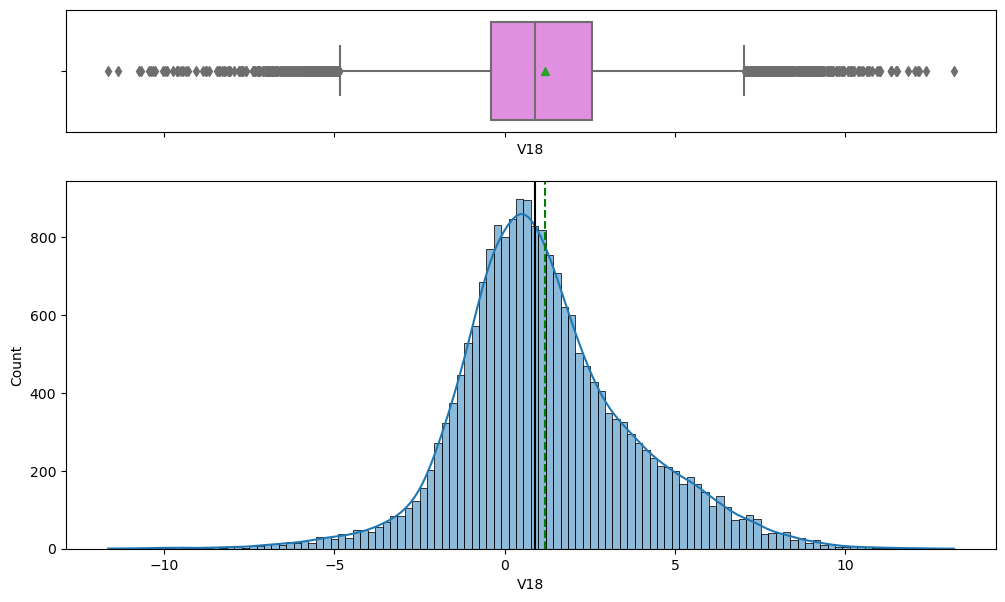

In [31]:
histogram_boxplot(train_df, "V18", figsize=(12, 7), kde=True, bins=None)

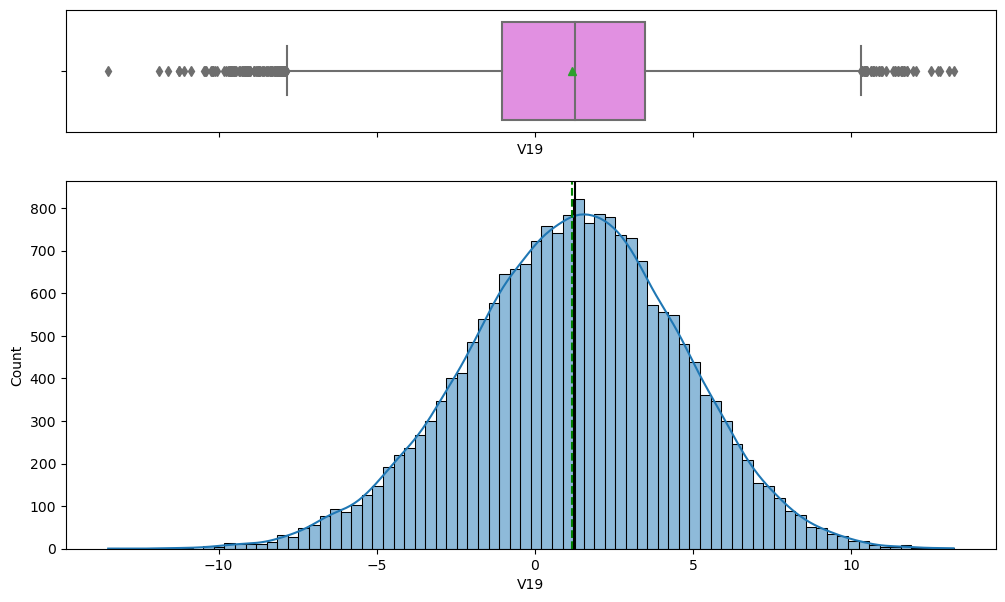

In [32]:
histogram_boxplot(train_df, "V19", figsize=(12, 7), kde=True, bins=None)

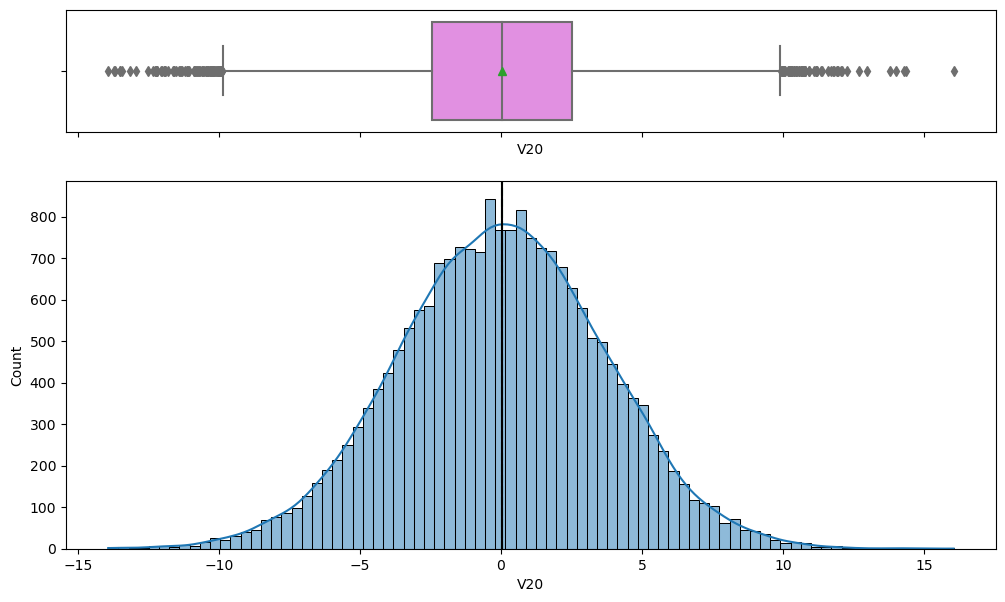

In [33]:
histogram_boxplot(train_df, "V20", figsize=(12, 7), kde=True, bins=None)

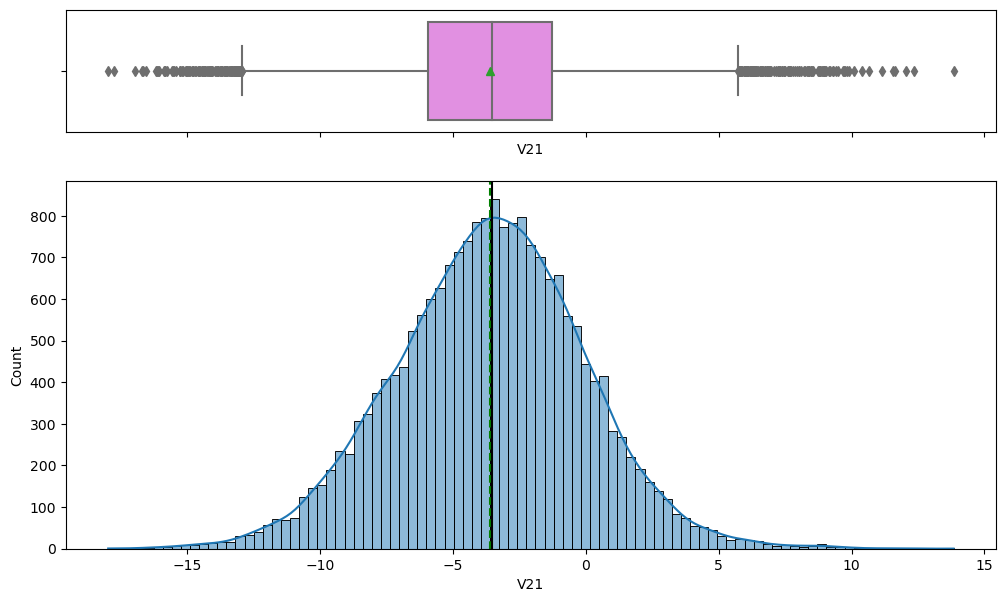

In [34]:
histogram_boxplot(train_df, "V21", figsize=(12, 7), kde=True, bins=None)

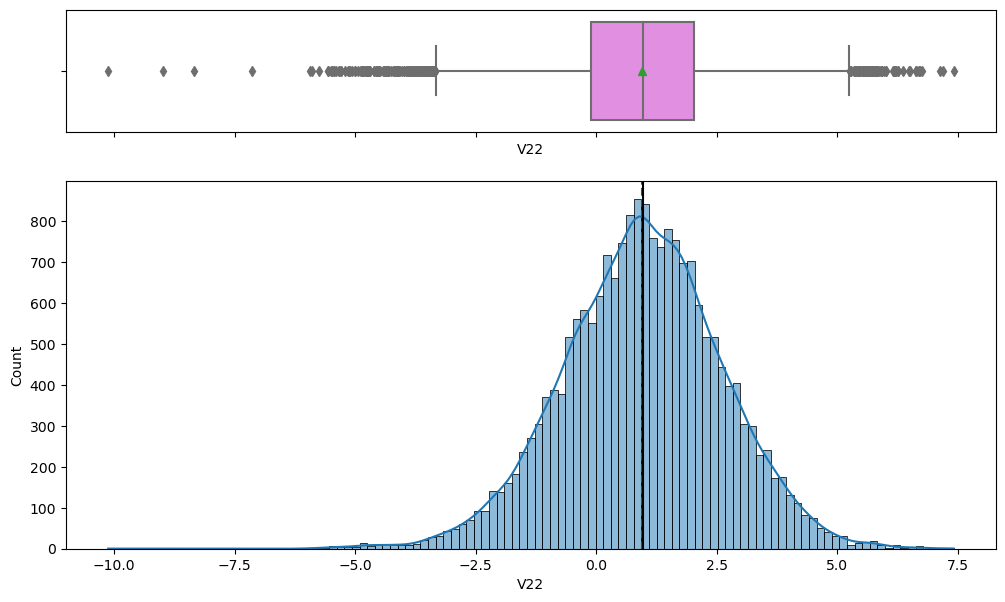

In [35]:
histogram_boxplot(train_df, "V22", figsize=(12, 7), kde=True, bins=None)

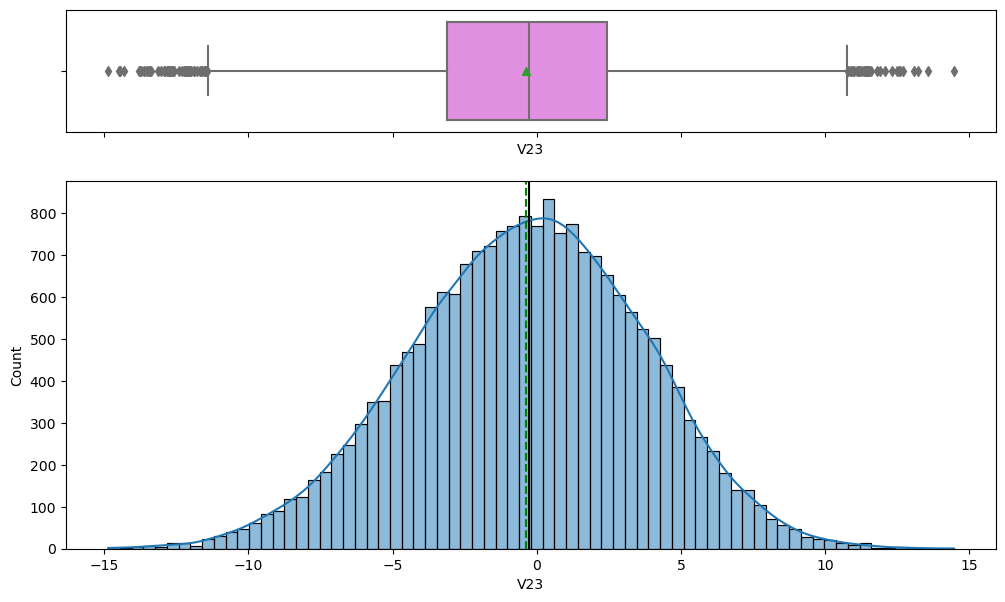

In [36]:
histogram_boxplot(train_df, "V23", figsize=(12, 7), kde=True, bins=None)

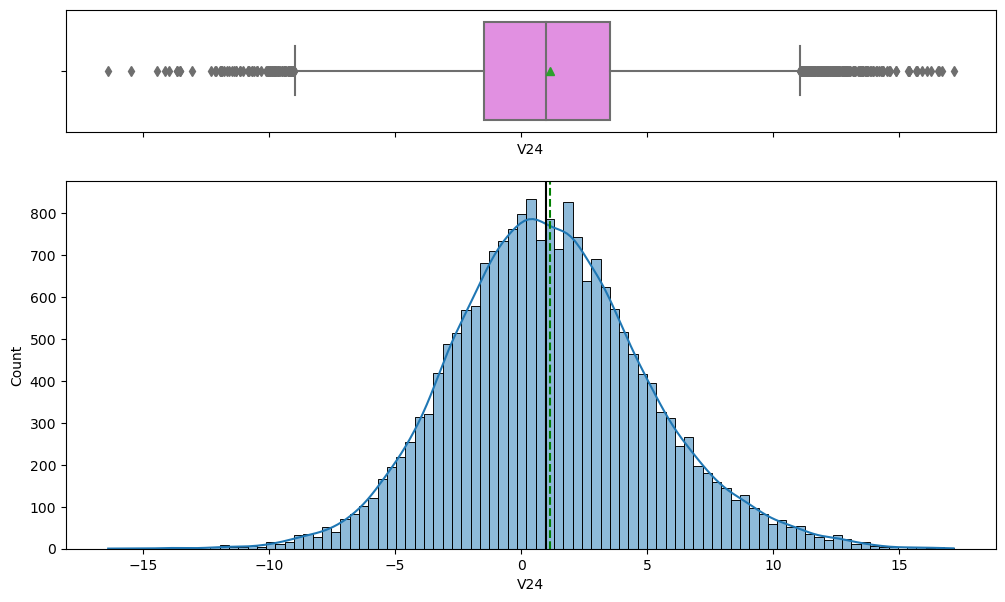

In [37]:
histogram_boxplot(train_df, "V24", figsize=(12, 7), kde=True, bins=None)

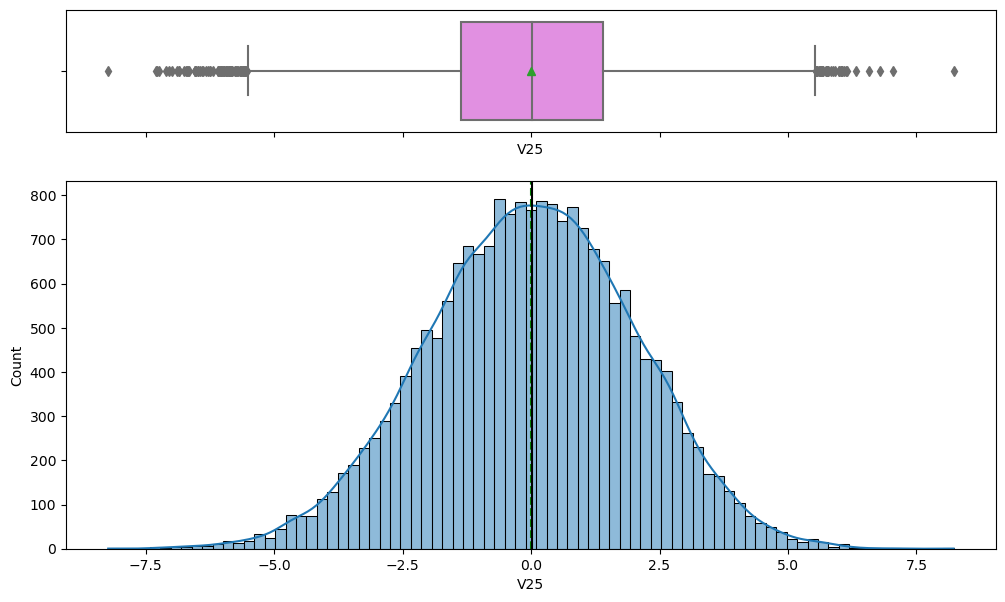

In [38]:
histogram_boxplot(train_df, "V25", figsize=(12, 7), kde=True, bins=None)

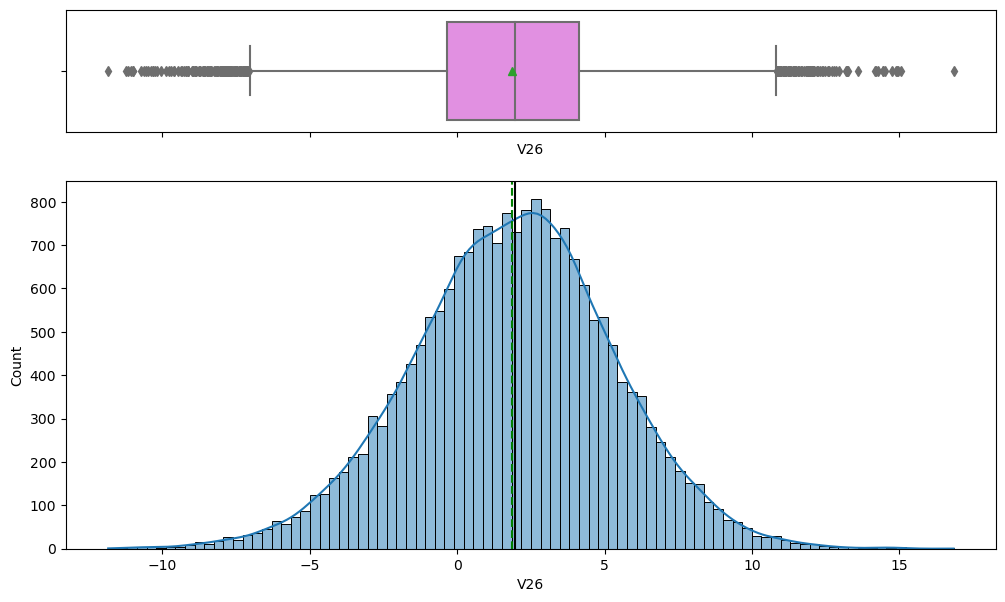

In [39]:
histogram_boxplot(train_df, "V26", figsize=(12, 7), kde=True, bins=None)

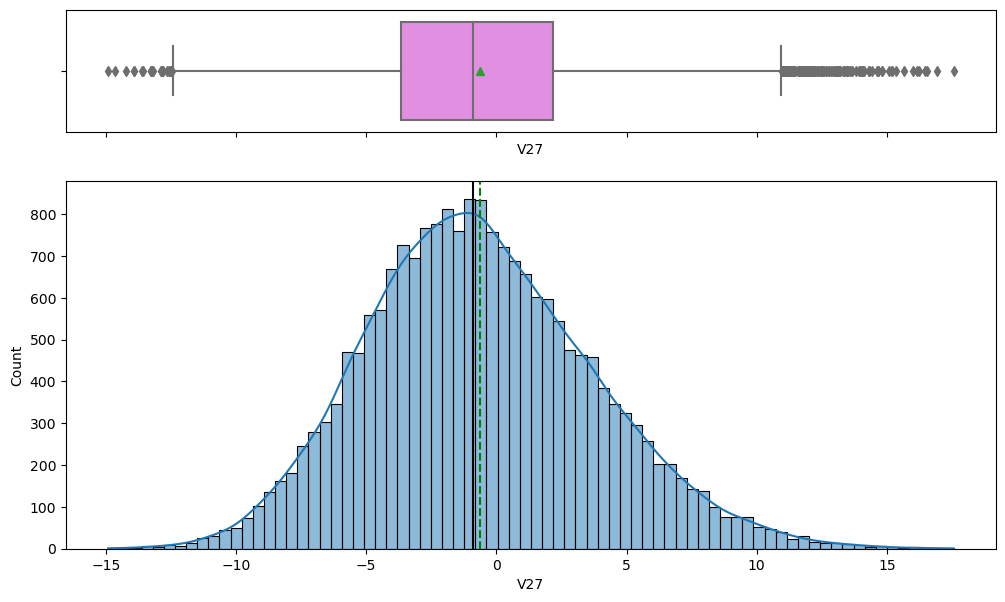

In [40]:
histogram_boxplot(train_df, "V27", figsize=(12, 7), kde=True, bins=None)

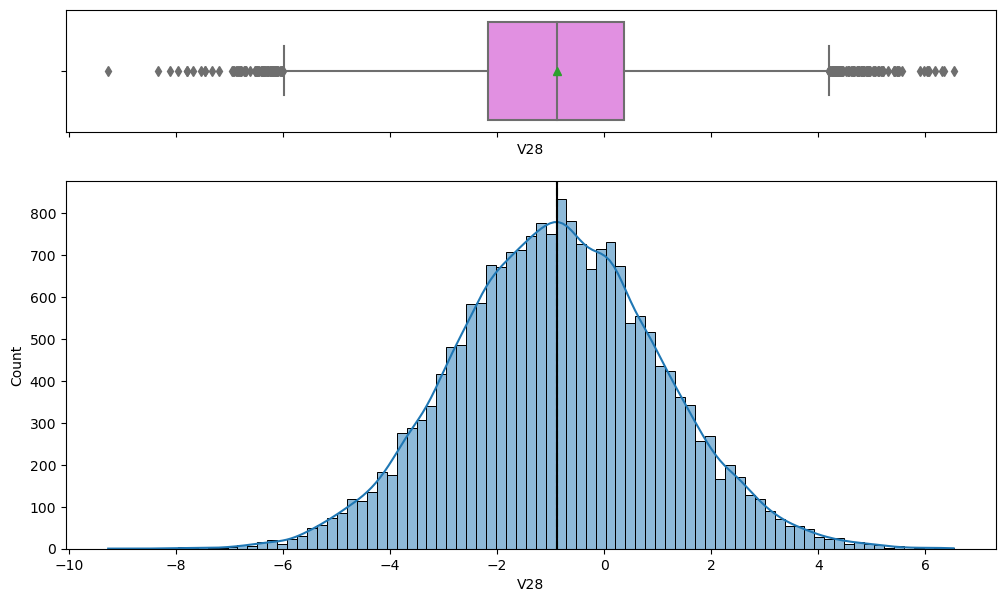

In [41]:
histogram_boxplot(train_df, "V28", figsize=(12, 7), kde=True, bins=None)

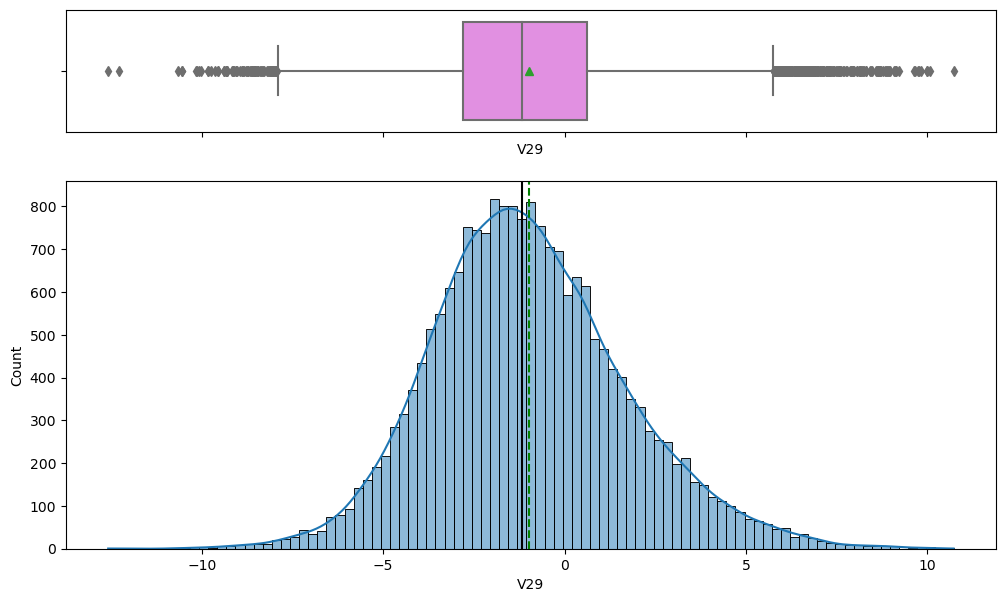

In [42]:
histogram_boxplot(train_df, "V29", figsize=(12, 7), kde=True, bins=None)

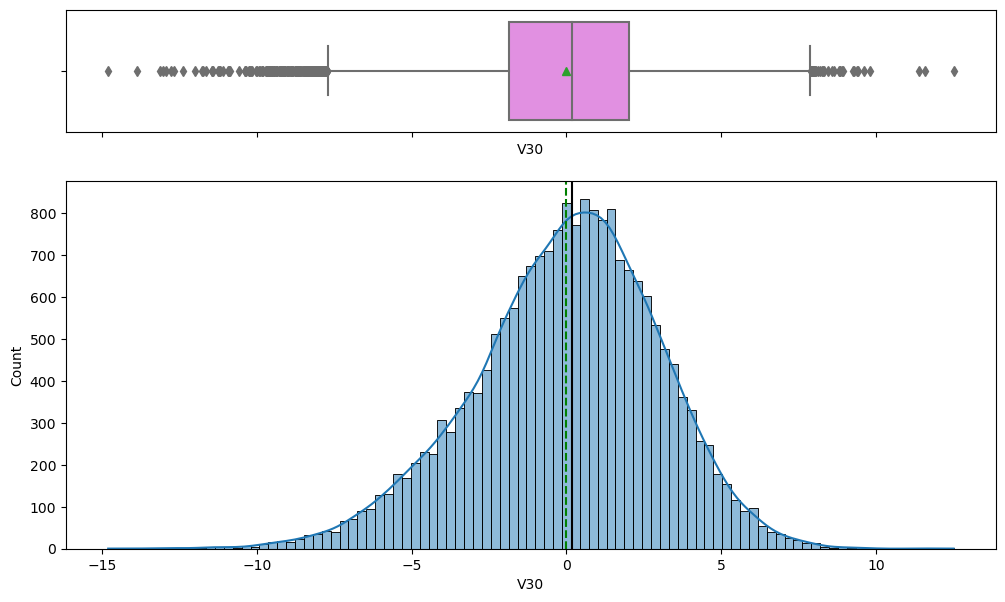

In [43]:
histogram_boxplot(train_df, "V30", figsize=(12, 7), kde=True, bins=None)

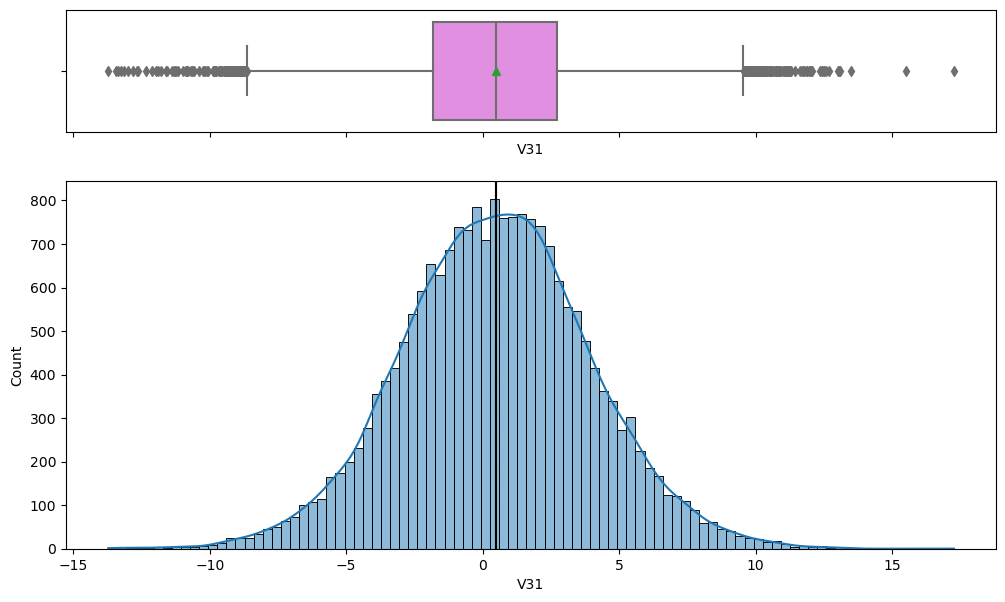

In [44]:
histogram_boxplot(train_df, "V31", figsize=(12, 7), kde=True, bins=None)

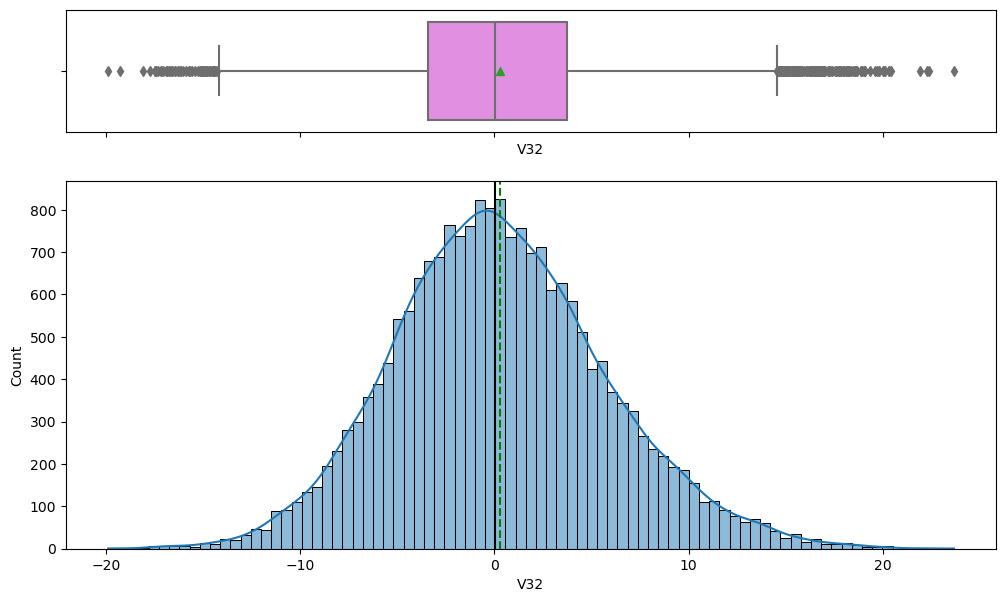

In [45]:
histogram_boxplot(train_df, "V32", figsize=(12, 7), kde=True, bins=None)

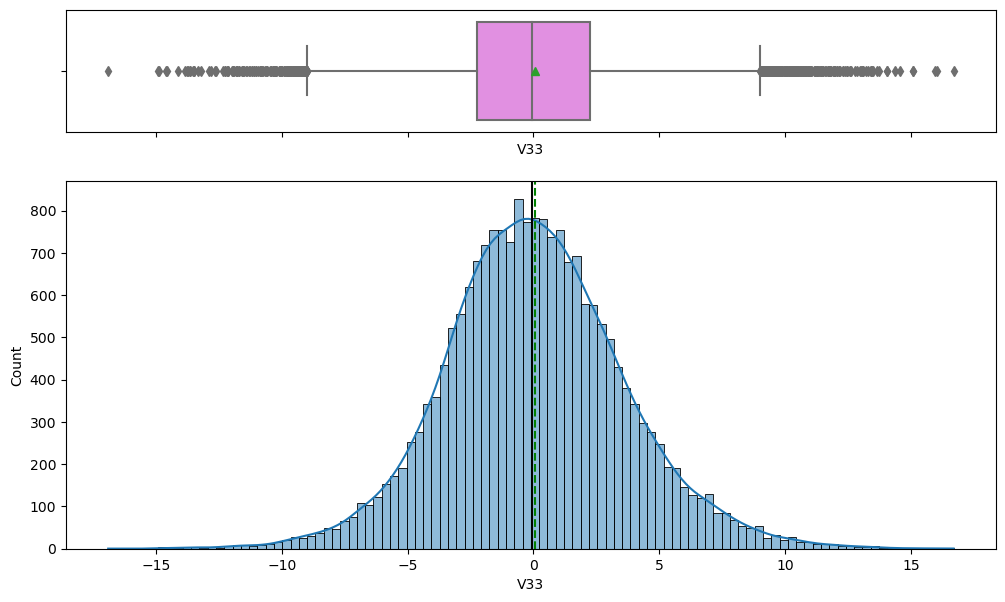

In [46]:
histogram_boxplot(train_df, "V33", figsize=(12, 7), kde=True, bins=None)

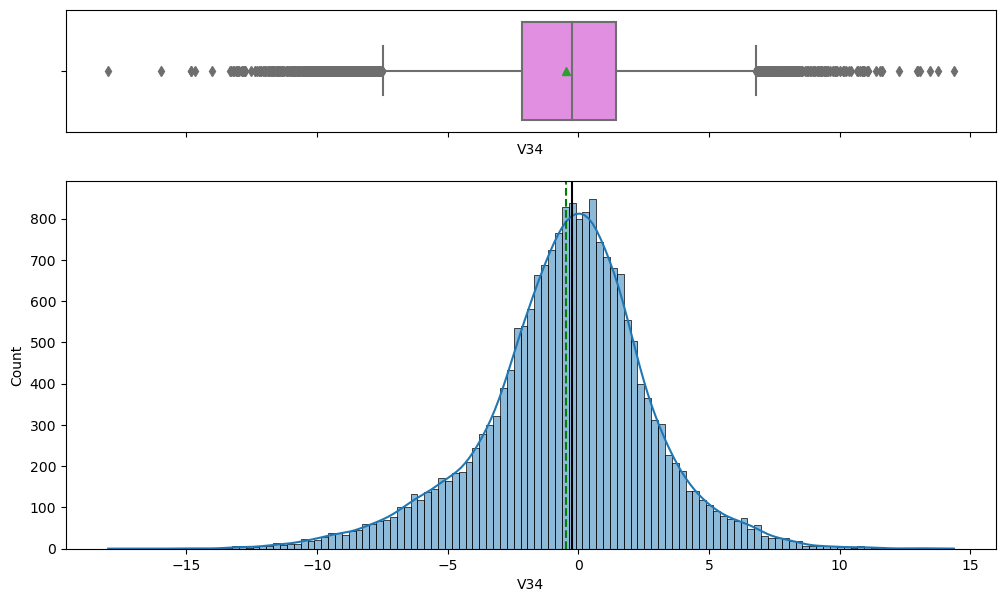

In [47]:
histogram_boxplot(train_df, "V34", figsize=(12, 7), kde=True, bins=None)

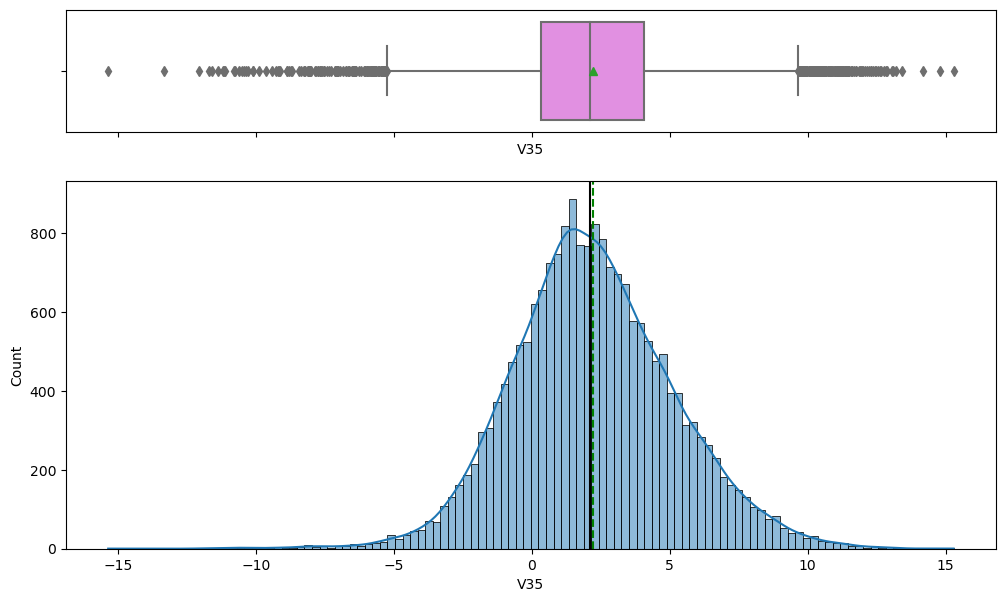

In [48]:
histogram_boxplot(train_df, "V35", figsize=(12, 7), kde=True, bins=None)

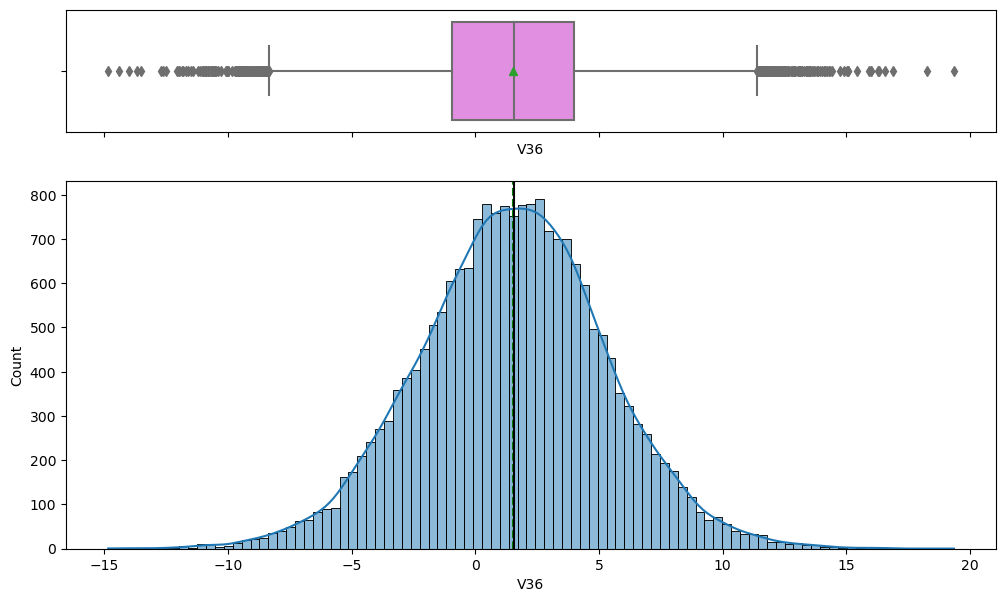

In [49]:
histogram_boxplot(train_df, "V36", figsize=(12, 7), kde=True, bins=None)

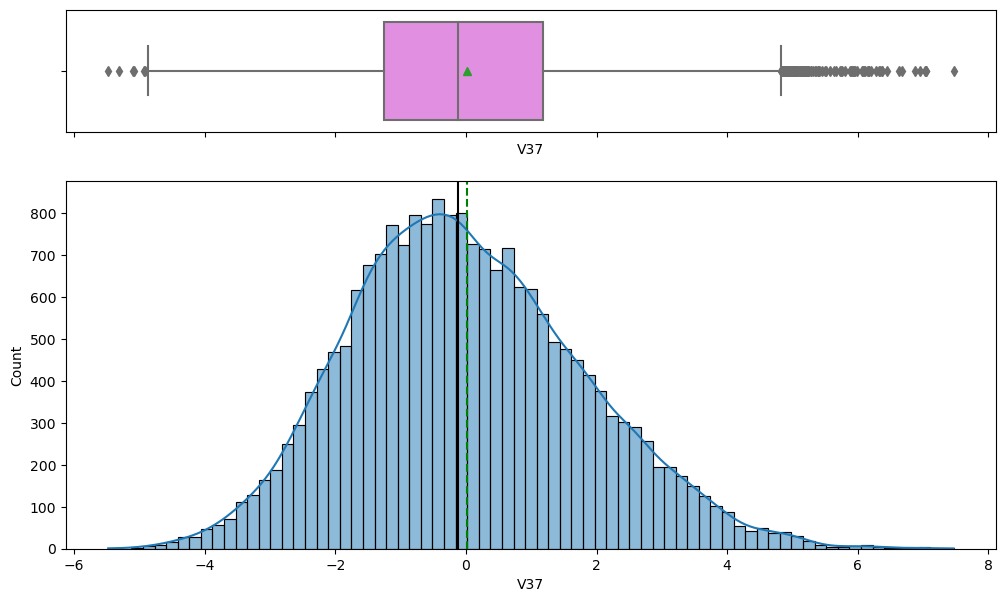

In [50]:
histogram_boxplot(train_df, "V37", figsize=(12, 7), kde=True, bins=None)

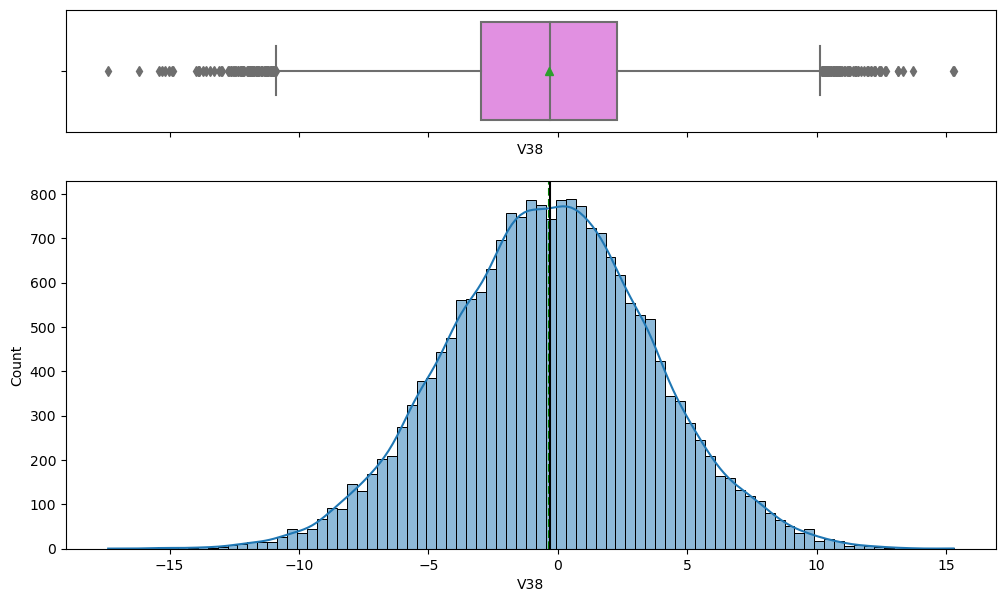

In [51]:
histogram_boxplot(train_df, "V38", figsize=(12, 7), kde=True, bins=None)

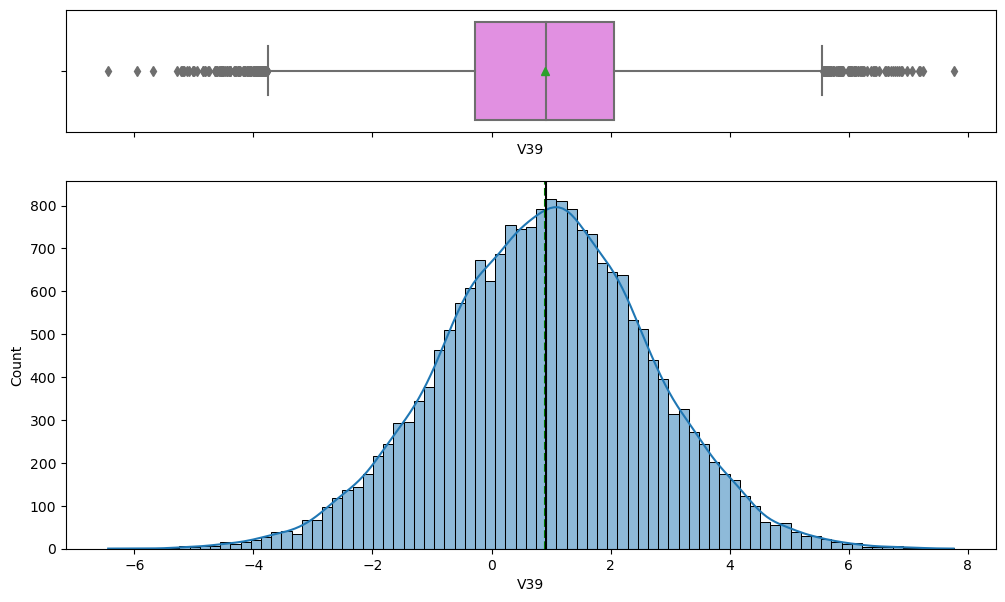

In [52]:
histogram_boxplot(train_df, "V39", figsize=(12, 7), kde=True, bins=None)

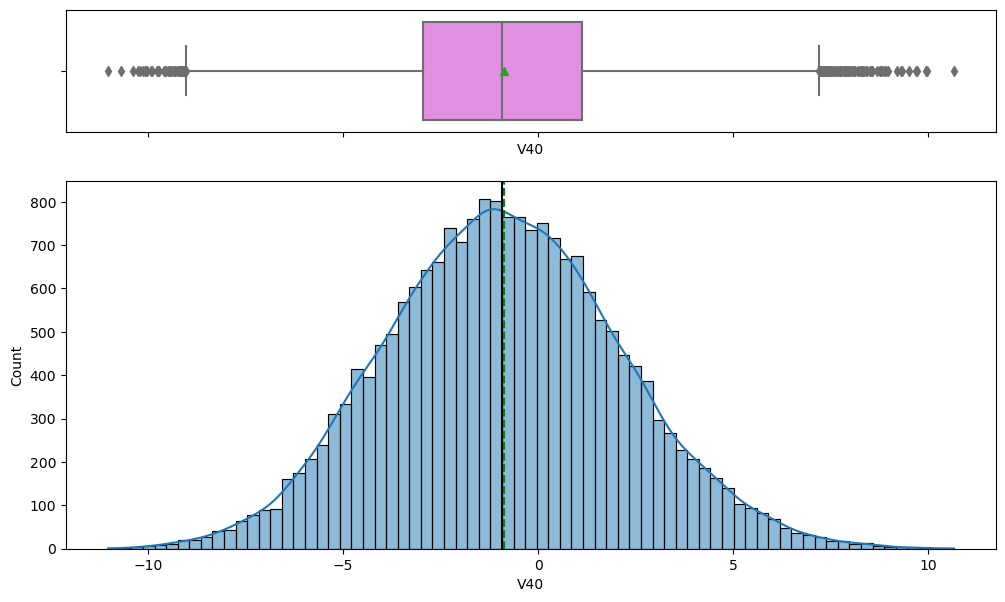

In [53]:
histogram_boxplot(train_df, "V40", figsize=(12, 7), kde=True, bins=None)

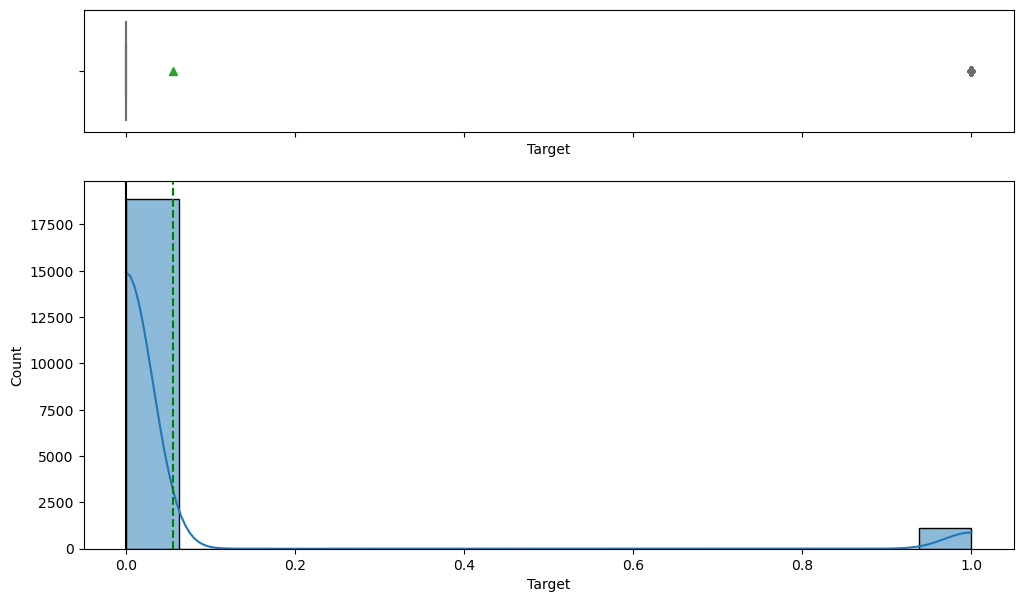

In [54]:
histogram_boxplot(train_df, "Target", figsize=(12, 7), kde=True, bins=None)

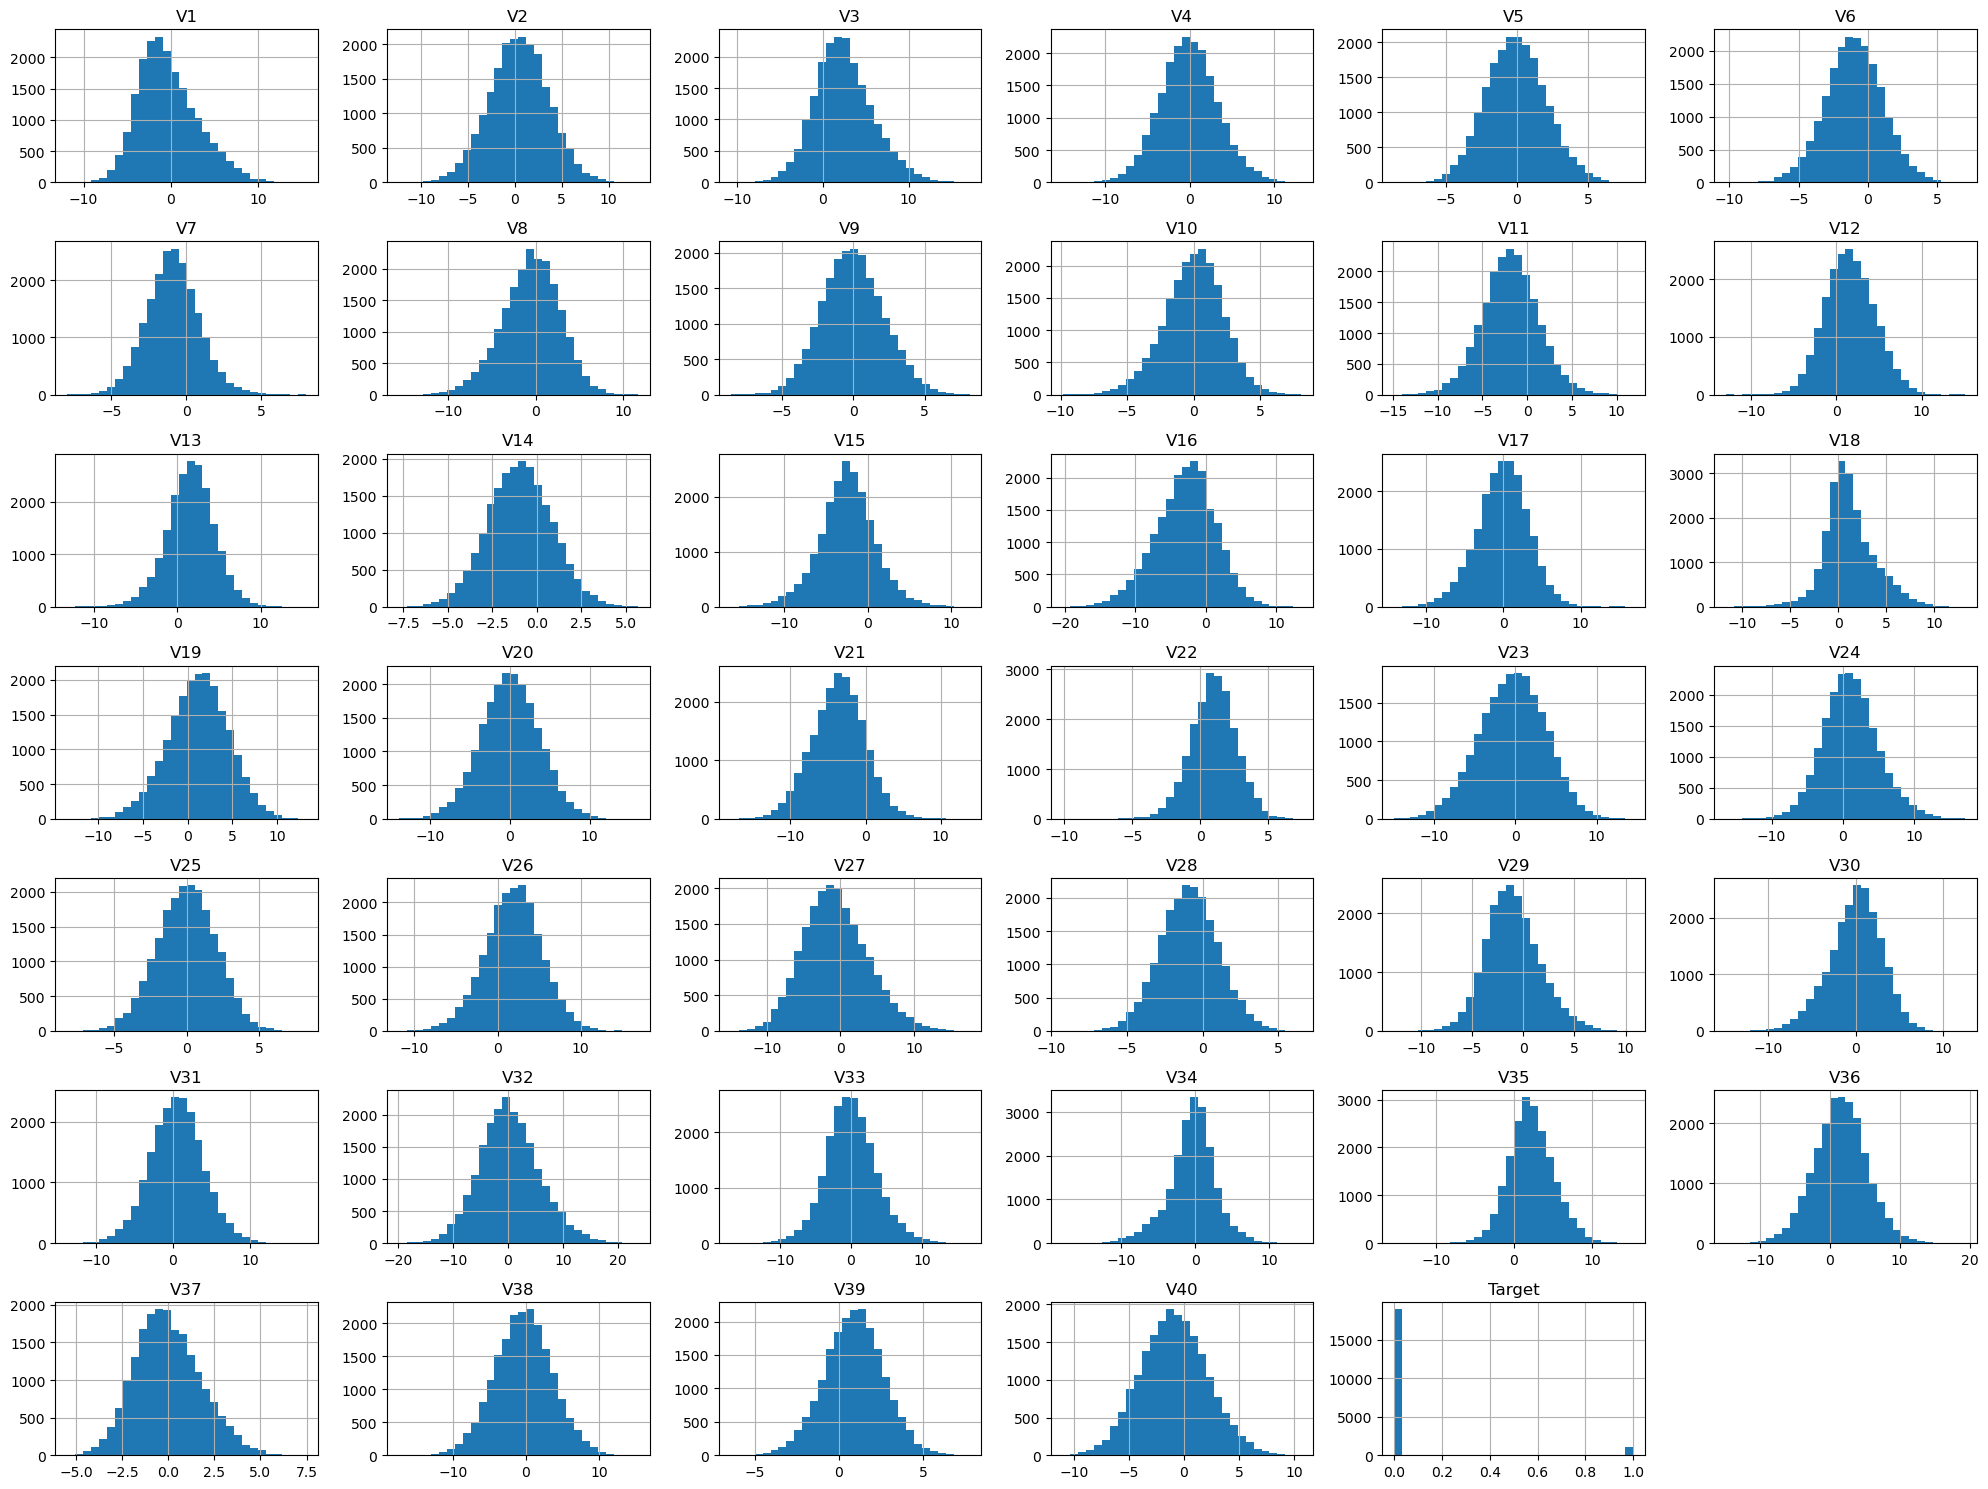

In [55]:
train_df.hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

### 🔍 Observations

#### Independent Variables:
- The histograms indicate that the data for these variables is approximately **normally distributed**, with the **mean and median fairly close** for most variables, further suggesting a normal distribution.
- The boxplots show **dots outside of the whiskers**, which represent **outliers**. These are observations that fall significantly higher or lower than the majority of the data.

#### Target Variable:
- The target variable is **highly imbalanced**, with a **much larger count of class `0`** compared to class `1`.
- This is consistent with the **numerical class distribution** observation noted earlier.


### Bivariate Analysis

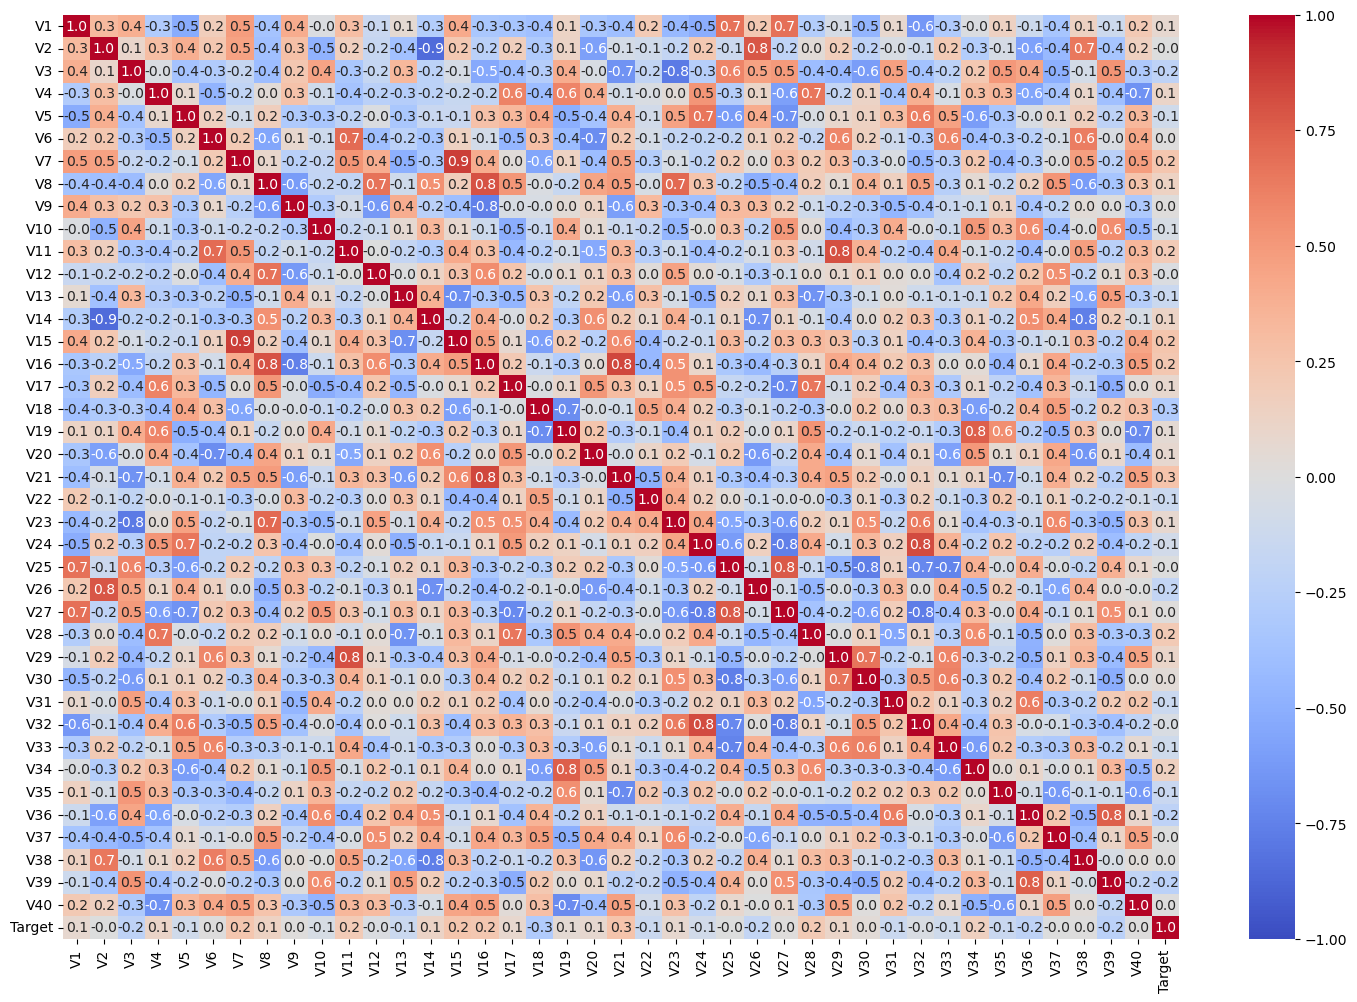

In [56]:
# Heatmap of the correlation coefficients between numerical variables in the dataset
cols_list = train_df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 12))
sns.heatmap(
    train_df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="coolwarm"
)
plt.show()

### 🧠 Correlation Analysis Observations

#### 🔗 Highly Correlated Features:
- A large number of features show strong **positive and negative correlations** with each other.
- This may indicate **redundancy** in the dataset, where one feature can be predicted from another with high accuracy.
- These features carry **similar information or signals** about the data.

#### ⚠️ Implications of Multicollinearity:
- Can lead to **multicollinearity** issues in linear models.
- May result in **overfitting** to the training dataset due to redundant features.
- **Increases computational complexity** without adding new information.
- It is advisable to consider **dimensionality reduction techniques** like **PCA** to address this.

#### 🎯 Relationship with Target:
- Some features (e.g., **V18**, **V21**) show a **stronger correlation with the target variable**.
- These features may be particularly important for predicting the target and should be examined more closely in subsequent analyses.


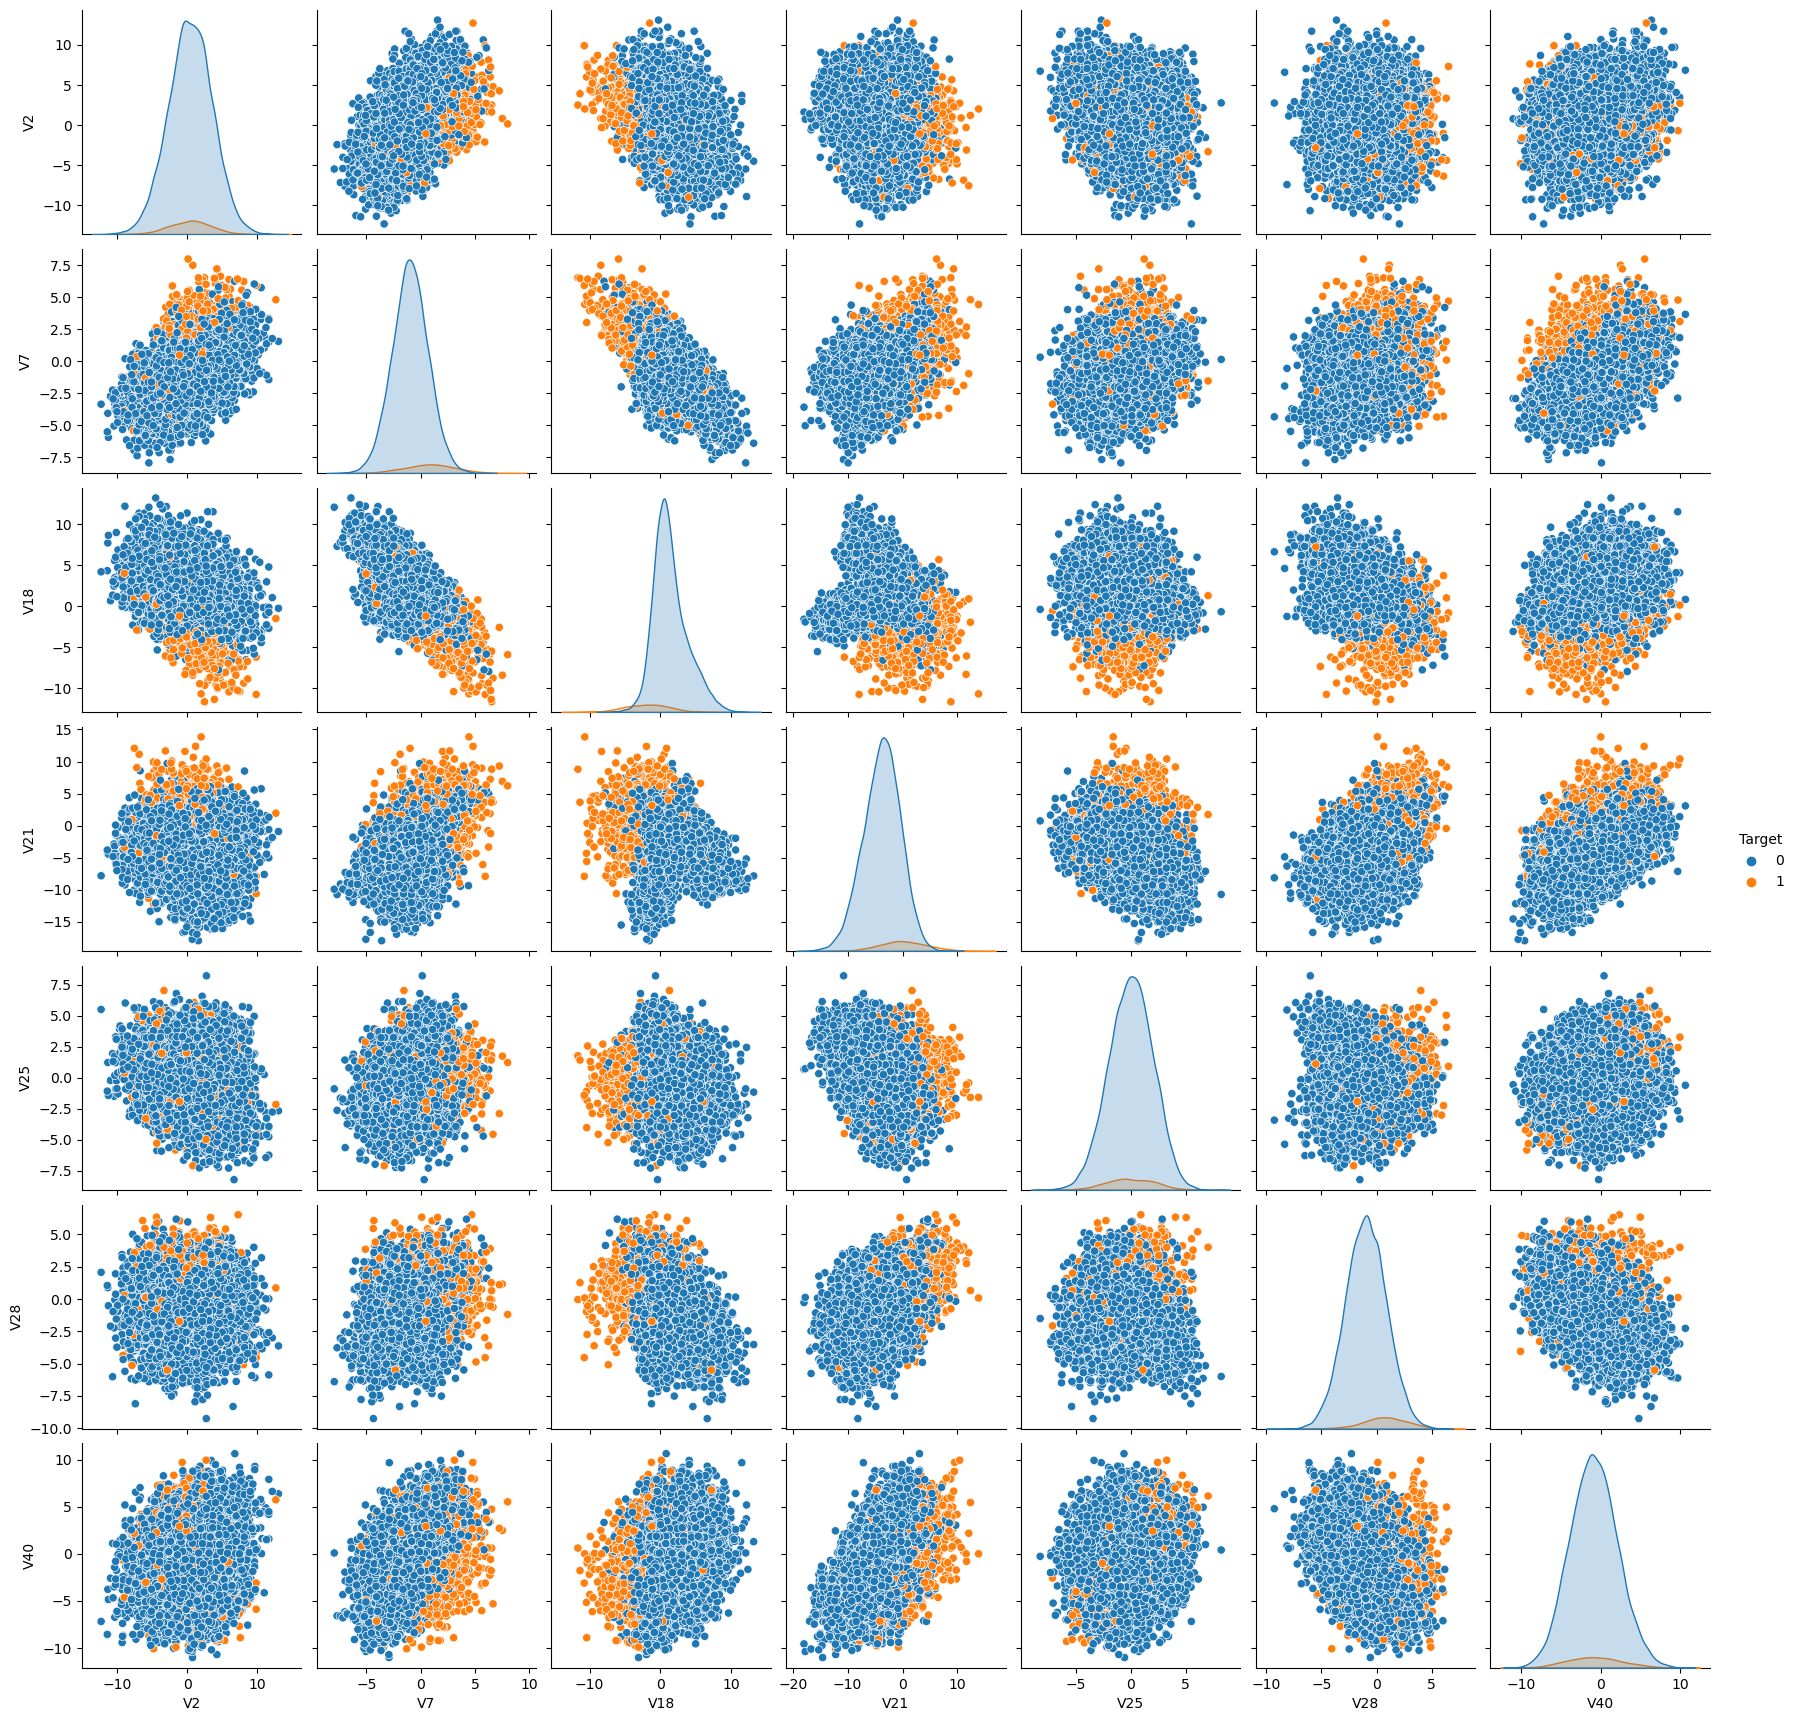

In [57]:
# Selected a subset of features for the pair plot for better performance and clarity
selected_features = ['V2', 'V7', 'V18', 'V21','V25', 'V28', 'V40', 'Target']

# Create the pair plot using the selected features
sns.pairplot(train_df[selected_features], hue='Target', diag_kind='kde')
plt.show()

### Pair Plot Observations

#### General Observations:

- **Class Imbalance**:  
  The plots show a significant imbalance between the two classes. Class `0` dominates, consistent with the earlier class distribution analysis.

- **Separable Features**:  
  - `V18` and `V21` show visible clustering differences between classes. These variables might be **strong predictors**.
  - `V28` and `V40` also exhibit some separation and could contribute to class distinction.

- **Overlapping Distributions**:  
  - Features like `V2`, `V7`, and `V25` have a large overlap between classes, suggesting they may be **less informative individually**.

- **Diagonal KDE Plots (Univariate Distributions)**:  
  - Most features follow approximately **normal distributions**.
  - Class `1` distributions (blue) are flatter due to fewer data points, highlighting class imbalance.
  - Some variables (e.g., `V28`) display slight skewness.

- **Correlation Patterns**:  
  - Some pairs such as (`V28`, `V40`) and (`V18`, `V25`) appear to be **correlated**.
  - `V18` and `V21` not only show correlation with each other but also with the target variable.

---

#### Insights:

- Focus on `V18`, `V21`, and `V28` for feature importance — they appear to provide the **best separation**.
- Potential **non-linear relationships** exist, which supports using **complex models** like neural networks.
- Consider dimensionality reduction (e.g., **PCA**) to handle multicollinearity.
- Apply **class balancing techniques** such as SMOTE or class weighting before model training.


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Data Preprocessing
   
</div>


In [58]:
# Dividing train data into X and y 
X = train_df.drop(["Target"], axis=1)
y = train_df["Target"]

In [59]:
# Splitting train dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
# Checking the number of rows and columns in training and validation sets
print(X_train.shape, X_val.shape)

(15000, 40) (5000, 40)


In [60]:
# Defining X (independent) and y (dependent) variables for test set
X_test = test_df.drop(['Target'], axis=1)
y_test = test_df['Target']
# Checking the number of rows and columns in test set
print(X_test.shape)

(5000, 40)


### 🧹 Data Preprocessing Overview and Observations

The following steps were taken to prepare the dataset for model training:

1. **Feature & Target Separation**:
   - From the `train_df`, features (`X`) were extracted by dropping the `Target` column.
   - The `Target` column was separately assigned to `y`, which will serve as the label for supervised learning.

2. **Train–Validation Split**:
   - The training dataset (`train_df`) was split into:
     - **Training set**: 75% (15,000 samples)
     - **Validation set**: 25% (5,000 samples)
   - Stratification was applied using the `stratify=y` argument to preserve the distribution of the target variable across the split. This helps in maintaining consistent label proportions between training and validation, especially important in classification and imbalanced data settings (though less impactful for regression).

3. **Test Set Preparation**:
   - Features (`X_test`) and target (`y_test`) were separately defined from the `test_df`.
   - The test set has **5,000 samples**, with 40 features — matching the training and validation feature dimensions.

---

### 🔍 Observations:
-  All datasets (`X_train`, `X_val`, `X_test`) have consistent feature dimensions: **(n, 40)**, ensuring compatibility with model input.
- Stratification ensures representative sampling of the target distribution across training and validation sets.
- Ensure that test data was **not used** in model training or hyperparameter tuning to prevent data leakage and overly optimistic results.

This preprocessing sets a solid foundation for fair and consistent model evaluation during training and final testing.


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Missing Value Imputation
   
</div>


In [61]:
imputer = SimpleImputer(strategy='median')

# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# fit and transform the imputer on test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [62]:
# Checking that there are no missing values in train or test sets
print(X_train.isna().sum().sum())
print("-" * 30)
print(X_val.isna().sum().sum())
print("-" * 30)
print(X_test.isna().sum().sum())

0
------------------------------
0
------------------------------
0


### Missing Value Imputation

- A `SimpleImputer` with the **median strategy** was applied to handle missing values in the dataset.
- The imputer was **fit on the training data** and then applied to the validation and test sets to ensure no data leakage.
- After transformation, a check confirmed that there are **no missing values remaining** in any of the datasets (train, validation, or test).
- Median imputation was chosen to be **robust against outliers**, which is suitable given that sensor data can have extreme readings.

✅ This step ensures that the model receives clean and consistent input features without any NaNs or incomplete rows.


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Model Building
   
</div>


## Model Evaluation Strategy 

### Objective Context

The objective of the Renewind project is to develop a classification model that can accurately identify potential wind turbine failures using sensor data. Given the significant cost associated with undetected failures, the model evaluation strategy must be aligned with the business goal of reducing unplanned downtime and minimizing replacement costs.

---

### Primary Evaluation Metric: Recall (True Positive Rate)

**Rationale:**

In this classification problem, a *false negative* (i.e., failing to predict an actual failure) leads to severe consequences, such as:

- Unexpected equipment failure  
- High replacement costs  
- Downtime in energy production  

As a result, minimizing false negatives is of utmost importance. This translates to **maximizing recall**, which measures the proportion of actual failures that are correctly identified by the model.

> A high recall ensures that most real failures are detected and maintenance can be scheduled proactively, thereby avoiding major breakdowns.

---

### Secondary Evaluation Metrics

While recall is the primary metric, other evaluation metrics help provide a broader view of the model’s performance and operational trade-offs.

| Metric           | Purpose |
|------------------|---------|
| **Precision**    | Indicates how many of the predicted failures were actually correct. Helps manage unnecessary inspection costs. |
| **F1 Score**     | Harmonic mean of precision and recall. Useful when both false positives and false negatives are relevant. |
| **ROC-AUC Score**| Measures the model's ability to distinguish between failure and non-failure across different thresholds. |
| **Business Cost**| Reflects real-world impact by assigning weights to TP, FP, and FN outcomes based on operational cost. |

---

### Cost-Sensitive Evaluation Matrix

The following table outlines how different prediction outcomes translate to real-world cost implications:

| Outcome           | Description                        | Cost Impact                  |
|-------------------|------------------------------------|------------------------------|
| True Positive     | Correctly predicted failure        | Repair cost (e.g., ₹100)     |
| False Negative    | Missed prediction of actual failure| Replacement cost (e.g., ₹1000)|
| False Positive    | Incorrectly predicted failure      | Inspection cost (e.g., ₹100) |
| True Negative     | Correctly predicted no failure     | No cost                      |

> Given this matrix, false negatives are the most costly. Therefore, recall must be prioritized during model evaluation and selection.

---

### Metrics Not Recommended as Primary

| Metric   | Reason for Exclusion |
|----------|----------------------|
| **Accuracy** | Can be misleading due to class imbalance. A model predicting all turbines as "No Failure" might show high accuracy while missing all actual failures. |
| **RMSE / MAE** | These are regression metrics and are not applicable to binary classification tasks. |

---

### Summary of Evaluation Strategy

| Evaluation Aspect         | Metric / Approach                 | Priority Level     |
|---------------------------|-----------------------------------|--------------------|
| Primary Metric            | Recall                            | High               |
| Complementary Metric      | F1 Score                          | Medium             |
| Business Insight          | Precision, Business Cost Function | Medium             |
| Discrimination Capability | ROC-AUC Score                     | Medium             |
| Discarded Metrics         | Accuracy, RMSE, MAE               | Not Applicable     |

---

This evaluation strategy ensures the model is selected and tuned based on business-critical requirements. By prioritizing recall, the model focuses on reducing the most costly classification errors, while additional metrics provide operational insights and help fine-tune trade-offs between performance and cost.


In [63]:
# Build base classification model using SGD
model_sgd = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(1, activation='sigmoid')  # sigmoid for binary classification
])

# Compile with binary crossentropy loss
model_sgd.compile(optimizer=SGD(learning_rate=0.01), loss=BinaryCrossentropy())

# Train the model
model_sgd.fit(X_train, y_train, epochs=50, batch_size=32, 
              validation_data=(X_val, y_val), verbose=0)

# Predict on validation set
val_preds_proba = model_sgd.predict(X_val)
val_preds = (val_preds_proba > 0.5).astype(int)

# Evaluation Metrics
precision = precision_score(y_val, val_preds)
recall = recall_score(y_val, val_preds)
f1 = f1_score(y_val, val_preds)
roc_auc = roc_auc_score(y_val, val_preds_proba)

# Confusion Matrix and Business Cost Calculation
tn, fp, fn, tp = confusion_matrix(y_val, val_preds).ravel()

# Output Results
print(f"\nSGD Model Classification Metrics:")
print(f"Precision:     {precision:.4f}")
print(f"Recall:        {recall:.4f}")
print(f"F1 Score:      {f1:.4f}")
print(f"ROC AUC:       {roc_auc:.4f}")
print(f"\nConfusion Matrix:")
print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step

SGD Model Classification Metrics:
Precision:     0.9830
Recall:        0.8309
F1 Score:      0.9006
ROC AUC:       0.9454

Confusion Matrix:
TP: 231, FP: 4, FN: 47, TN: 4718


### SGD Model Classification Results

#### Classification Metrics

| Metric       | Value   |
|--------------|---------|
| Precision    | 0.9830  |
| Recall       | 0.8309  |
| F1 Score     | 0.9006  |
| ROC AUC      | 0.9454  |

#### Confusion Matrix

|                         | Predicted Positive | Predicted Negative |
|-------------------------|--------------------|--------------------|
| Actual Positive (1)     | TP = 231            | FN = 47             |
| Actual Negative (0)     | FP = 4              | TN = 4718           |

---

### Observations

- ✅ **Very High Precision (0.9830)**: The model is extremely accurate when it predicts a failure — **only 4 false alarms out of 4718 negatives**, keeping **inspection costs very low**.
- ⚠️ **Moderate Recall (0.8309)**: The model **misses about 16.9% of actual failures** (47 false negatives), which may result in **replacement or service losses**.
- ✅ **Strong F1 Score (0.9006)**: Shows a solid balance between precision and recall — a sign of overall model effectiveness.
- ✅ **High ROC AUC (0.9454)**: Confirms excellent class separation capability — the model reliably distinguishes between failure and non-failure cases.
- ✅ **Very Low False Positive Rate**: Just 4 out of 4722 non-failures were incorrectly flagged — ideal for avoiding unnecessary interventions.
- 🔧 **Improvement Area**: Despite its strengths, further reducing **false negatives** could enhance preventive maintenance capabilities. Techniques such as **cost-sensitive training, ensemble methods, or threshold tuning** may help.

---

### Summary

- This SGD model is **highly precise and efficient**.
- Ideal when the **cost of false positives is high**, but **missed failures are still a concern**.


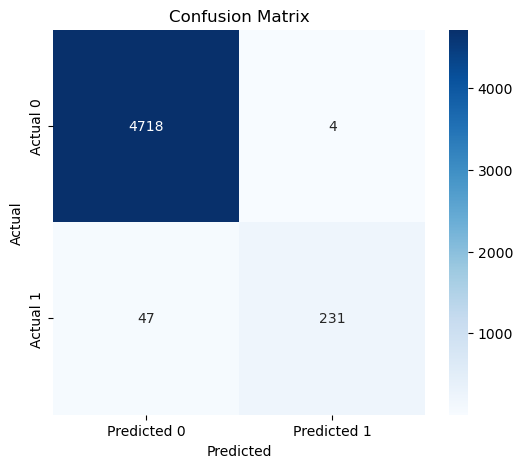

In [64]:
# Confusion matrix
cm = confusion_matrix(y_val, val_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Observations

The heatmap shows the distribution of classification outcomes:

- **True Positives (TP):** 231 cases where failures were correctly identified.  
- **True Negatives (TN):** 4718 cases where non-failures were correctly predicted.  
- **False Negatives (FN):** 47 missed failures — actual failures predicted as non-failures.  
- **False Positives (FP):** 4 non-failures mistakenly predicted as failures.

---

#### Key Points

- ✅ The diagonal cells (TP and TN) dominate, reflecting a **strongly performing classifier**.
- ✅ The number of **false positives is extremely low**, minimizing unnecessary inspections and reducing associated operational costs.
- ⚠️ However, **false negatives (47)** remain a critical concern — each missed failure could translate to **downtime or turbine damage**.

---

### Comment

While the model demonstrates **excellent precision and high overall accuracy**, the **recall rate is moderate**, resulting in **47 missed failure cases**.

In the context of **wind turbine maintenance**, these false negatives carry significant **business risk** due to unplanned breakdowns and costly repairs. Therefore, **further recall improvement is necessary**, which may be achieved by:

- ✅ Increasing model complexity with **deeper neural architectures**
- ✅ Applying **dropout** to reduce overfitting
- ✅ Using **class weighting** to prioritize minority (failure) class
- ✅ Exploring **cost-sensitive learning** or **threshold tuning** to shift focus towards capturing more actual failures

The goal is to **reduce false negatives** without introducing too many false positives — thereby maintaining **cost-efficiency** while improving **failure detection reliability**.


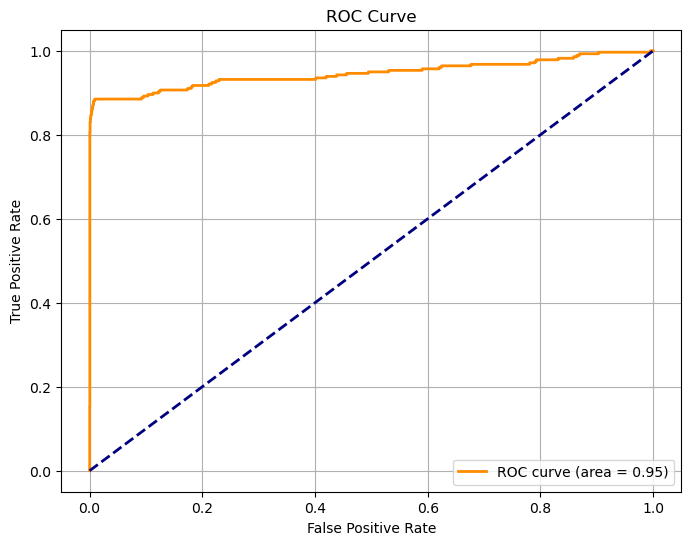

In [65]:
fpr, tpr, _ = roc_curve(y_val, val_preds_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Observations

- The ROC curve lies well above the diagonal (baseline), indicating strong classifier performance.
- The **AUC score of 0.95** shows that the model is highly capable of distinguishing between the positive (failure) and negative (non-failure) classes.
- The curve is steep in the early region, which means that at lower false positive rates, the model still maintains high true positive rates — an ideal scenario for early and accurate failure detection.
- The curve gradually flattens near the top-right, reflecting diminishing returns at higher false positive thresholds.

---

### Comment

A high **ROC AUC value of 0.94** confirms that the model can effectively rank predictions and identify failures across various thresholds. This is particularly valuable in scenarios like **predictive maintenance**, where different thresholds might be applied depending on **risk tolerance** or **resource constraints**.

However, while ROC AUC is a strong overall indicator, it **does not directly penalize false negatives**, which are **costly in the Renewind use case**. Therefore, ROC AUC should be used in conjunction with **recall** and **business cost-based metrics** to guide final model selection and threshold tuning.


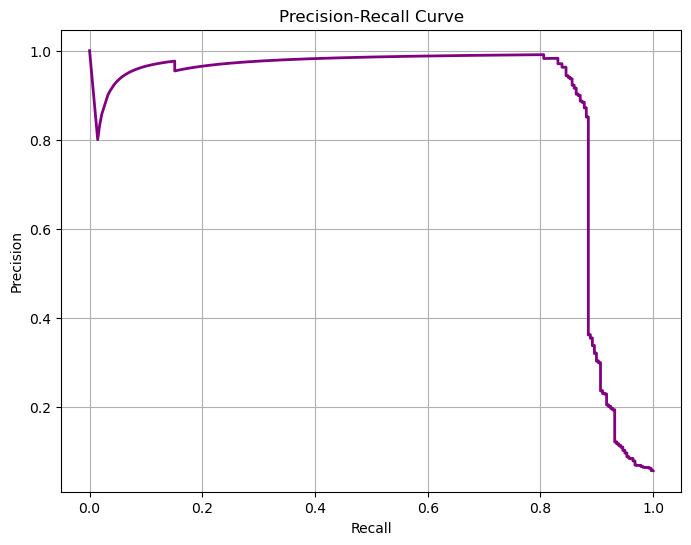

In [66]:
precision_vals, recall_vals, _ = precision_recall_curve(y_val, val_preds_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


### Observations

- The curve maintains **high precision values (above 0.9)** for a wide range of recall values up to approximately **0.85**.
- Beyond **0.85 recall**, precision starts dropping sharply, indicating that pushing for more recall introduces more false positives.
- The **sharp decline near the end** reflects the common trade-off in imbalanced classification — improving recall too aggressively leads to a substantial loss in precision.
- The model performs best in the **middle range**, balancing both precision and recall effectively.

---



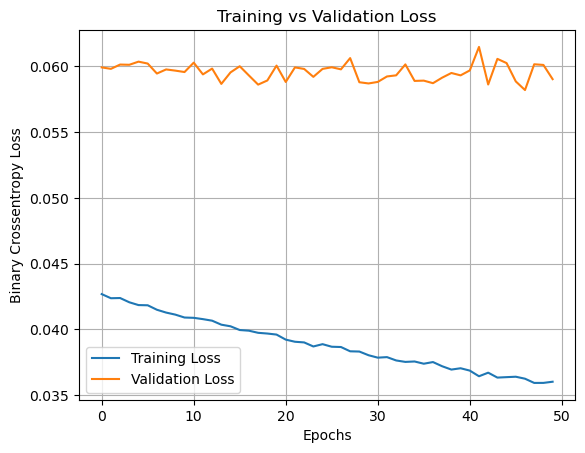

In [67]:
history = model_sgd.fit(X_train, y_train, epochs=50, batch_size=32, 
                        validation_data=(X_val, y_val), verbose=0)

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()


### Observations

- The **training loss** consistently decreases over epochs, indicating that the model is successfully learning from the training data.
- In contrast, the **validation loss** remains relatively flat and even fluctuates slightly, with no clear downward trend.
- This consistent gap between training and validation loss suggests that the model is **overfitting** — it is learning patterns in the training set that do not generalize well to unseen data.
- The gap becomes more noticeable as training progresses, especially **beyond epoch 20**.


In [68]:
def compute_permutation_importance(model, X: pd.DataFrame, y, metric=recall_score, n_repeats=10):
    # Get baseline recall
    baseline_preds = (model.predict(X).flatten() > 0.5).astype(int)
    baseline_score = metric(y, baseline_preds)

    importances = []
    feature_names = X.columns

    for col in feature_names:
        score_drops = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            X_permuted[col] = np.random.permutation(X_permuted[col].values)
            permuted_preds = (model.predict(X_permuted).flatten() > 0.5).astype(int)
            permuted_score = metric(y, permuted_preds)
            score_drops.append(baseline_score - permuted_score)  # drop in recall
        importances.append(np.mean(score_drops))

    return pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Run on validation data
feature_importances = compute_permutation_importance(
    model_sgd,
    pd.DataFrame(X_val, columns=X_val.columns),
    y_val,
    metric=recall_score
)



157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
157/157 ━━━

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
157/157 ━━━

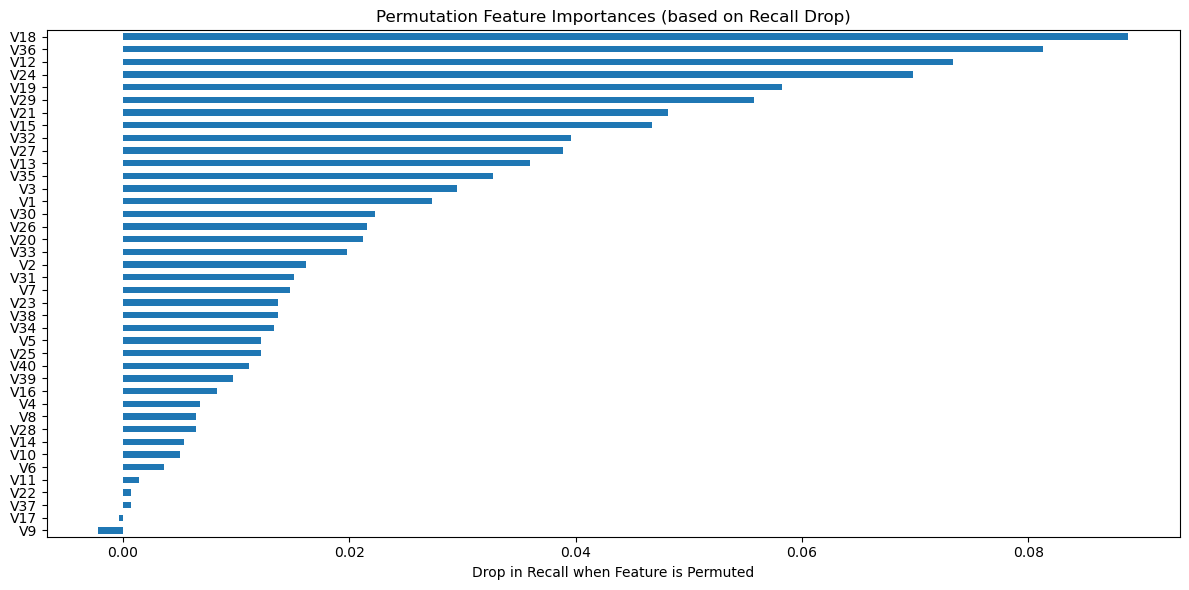

In [69]:
# Plot
plt.figure(figsize=(12, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title("Permutation Feature Importances (based on Recall Drop)")
plt.xlabel("Drop in Recall when Feature is Permuted")
plt.tight_layout()
plt.show()

### 🔍 Observations: Permutation Feature Importance

- The horizontal bar chart visualizes **how much recall drops** when individual features are permuted.
- Features with **greater bars** indicate **higher importance** in helping the model correctly detect failures.
- **V18**, **V36**, and **V12** are the **most important features**, each contributing to a significant drop in recall (~0.08–0.09) when shuffled.
- These top variables are likely **critical sensor signals** or **engineered predictors** that the model heavily relies on.
- The **top 10 influential features** include:  
  `V18, V36, V12, V24, V19, V29, V1, V15, V32, V27`.

- Features like **V9**, **V17**, **V37**, and **V22** show **almost zero drop in recall**, suggesting minimal contribution to the model’s predictions. These may be redundant or noisy.

---

### 💡 Comment

- The importance plot gives **actionable insights** into which input variables matter most for **failure prediction**.
- These findings can help in:
  - ✅ Prioritizing sensor accuracy and maintenance for top features (e.g., V18, V36).
  - ✅ Reducing dimensionality by removing near-zero impact features.
  - ✅ Guiding future **feature engineering or sensor selection**.

> 📌 Tip: To further validate importance, consider cross-checking these rankings with **SHAP values** or **training a model on just top-N features** to evaluate performance trade-offs.


### Base Model Performance: SGD (1 Hidden Layer)

- The base model uses a simple architecture with **1 hidden layer of 64 neurons** and the **SGD optimizer**.
- It achieves the following classification metrics on the validation set:

  - **Precision**: 0.9830  
  - **Recall**: 0.8309  
  - **F1 Score**: 0.9006  
  - **ROC AUC**: 0.9454

- **Confusion Matrix**:
  - True Positives (TP): 231  
  - False Positives (FP): 4  
  - False Negatives (FN): 47  
  - True Negatives (TN): 4718

---

- ✅ **High precision (0.9830)** indicates that when the model predicts a failure, it is almost always correct — minimizing unnecessary inspections.
- ⚠️ **Moderate recall (0.8309)** shows that **47 actual failures were missed**, which may result in operational disruptions if not addressed.

---

**Comment**:  
While this base SGD model offers a **strong starting benchmark**, its **shallow architecture** and lack of complexity might restrict its ability to detect nuanced failure patterns. The **high number of false negatives (47)** is a concern in a **predictive maintenance setting**, where undetected failures can lead to high replacement or repair costs.

To address this, subsequent models should explore:

- ✅ **Deeper architectures** for richer feature extraction  
- ✅ **Advanced optimizers** like **Adam** for better convergence  
- ✅ **Dropout regularization** to combat overfitting  
- ✅ **Class weighting** or **cost-sensitive approaches** to enhance recall

These enhancements are aimed at **improving failure detection**, especially reducing false negatives while maintaining a low false positive rate.


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Model Performance Improvement
   
</div>


In [73]:
def build_model(layers=1, optimizer='adam', dropout=0.0):
    model = Sequential()
    
    # Input layer
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    
    # Hidden layers
    for _ in range(layers - 1):
        model.add(Dense(64, activation='relu'))
        if dropout > 0:
            model.add(Dropout(dropout))
    
    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile with Recall as the only metric
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=[Recall()])
    
    return model

In [74]:
configs = [
    {'name': 'SGD_1L', 'layers': 1, 'optimizer': SGD(), 'dropout': 0.0},
    {'name': 'SGD_3L', 'layers': 3, 'optimizer': SGD(), 'dropout': 0.0},
    {'name': 'Adam_3L', 'layers': 3, 'optimizer': Adam(), 'dropout': 0.0},
    {'name': 'Adam_3L_Dropout', 'layers': 3, 'optimizer': Adam(), 'dropout': 0.3},
    {'name': 'Adam_5L_Dropout', 'layers': 5, 'optimizer': Adam(), 'dropout': 0.3},
    {'name': 'SGD_5L_Dropout', 'layers': 5, 'optimizer': SGD(learning_rate=0.01), 'dropout': 0.2},
    {'name': 'Adam_2L', 'layers': 2, 'optimizer': Adam(), 'dropout': 0.1},
    {'name': 'Adam_4L_Dropout', 'layers': 4, 'optimizer': Adam(), 'dropout': 0.2},
    {'name': 'SGD_4L_Dropout', 'layers': 4, 'optimizer': SGD(learning_rate=0.01), 'dropout': 0.1},
    {'name': 'Adam_6L_Dropout', 'layers': 6, 'optimizer': Adam(), 'dropout': 0.4},
    {'name': 'Adam_6L_Dropout_CW', 'layers': 6, 'optimizer': Adam(), 'dropout': 0.4, 'class_weight': 'balanced'},
    {'name': 'SGD_3L_Dropout_CW', 'layers': 3, 'optimizer': SGD(learning_rate=0.01), 'dropout': 0.2, 'class_weight': 'balanced'}
]
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
)

results = []

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5)

for config in configs:
    print(f"\n🔧 Training: {config['name']}")
    
    model = build_model(
        layers=config['layers'],
        optimizer=config['optimizer'],
        dropout=config['dropout']
    )

    # Compute class weights if required
    if config.get('class_weight') == 'balanced':
        class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
        class_weight = {i: class_weights_array[i] for i in range(len(class_weights_array))}
    else:
        class_weight = None

    # Train model
    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100, batch_size=32, verbose=0,
        callbacks=[early_stop, lr_scheduler],
        class_weight=class_weight
    )

    # Predict for train and val
    y_train_probs = model.predict(X_train).ravel()
    y_val_probs = model.predict(X_val).ravel()
    y_train_preds = (y_train_probs >= 0.5).astype(int)
    y_val_preds = (y_val_probs >= 0.5).astype(int)

    # Train Metrics
    train_recall = recall_score(y_train, y_train_preds)
    train_precision = precision_score(y_train, y_train_preds)
    train_f1 = f1_score(y_train, y_train_preds)#http://localhost:8888/notebooks/Desktop/Python_Scripts/Great_Lakes/ReneWind/ReneWind-Copy1.ipynb#
    train_roc_auc = roc_auc_score(y_train, y_train_probs)
    train_tn, train_fp, train_fn, train_tp = confusion_matrix(y_train, y_train_preds).ravel()

    # Val Metrics
    val_recall = recall_score(y_val, y_val_preds)
    val_precision = precision_score(y_val, y_val_preds)
    val_f1 = f1_score(y_val, y_val_preds)
    val_roc_auc = roc_auc_score(y_val, y_val_probs)
    val_tn, val_fp, val_fn, val_tp = confusion_matrix(y_val, y_val_preds).ravel()

    results.append({
        'Model': config['name'],

        'Train_Recall': train_recall,
        'Val_Recall': val_recall,

        'Train_Precision': train_precision,
        'Val_Precision': val_precision,

        'Train_F1': train_f1,
        'Val_F1': val_f1,

        'Train_ROC_AUC': train_roc_auc,
        'Val_ROC_AUC': val_roc_auc,

        'Train_TP': train_tp,
        'Train_FN': train_fn,
        'Train_FP': train_fp,

        'Val_TP': val_tp,
        'Val_FN': val_fn,
        'Val_FP': val_fp
    })

results_df = pd.DataFrame(results).sort_values(by='Val_Recall', ascending=False)

print("\n📊 Model Comparison Based on Classification Metrics:")
pd.set_option("display.max_columns", None)  # Show all columns
print(results_df)


🔧 Training: SGD_1L
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step

🔧 Training: SGD_3L
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step

🔧 Training: Adam_3L
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step

🔧 Training: Adam_3L_Dropout
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step

🔧 Training: Adam_5L_Dropout
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step

🔧 Training: SGD_5L_Dropout
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step

🔧 Training: Adam_2L
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step

🔧 Training: Adam_4L_Dropout
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step

🔧 Training: SGD_4L_Dropout
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step



In [75]:
results_df

Model  Train_Recall  Val_Recall  Train_Precision  \
11   SGD_3L_Dropout_CW      0.929087    0.888489         0.912633   
7      Adam_4L_Dropout      0.908654    0.870504         0.983095   
10  Adam_6L_Dropout_CW      0.914663    0.870504         0.875719   
4      Adam_5L_Dropout      0.906250    0.866906         0.981771   
5       SGD_5L_Dropout      0.902644    0.866906         0.985564   
6              Adam_2L      0.891827    0.863309         0.991979   
8       SGD_4L_Dropout      0.907452    0.863309         0.993421   
3      Adam_3L_Dropout      0.896635    0.859712         0.993342   
2              Adam_3L      0.871394    0.856115         0.975774   
9      Adam_6L_Dropout      0.894231    0.856115         0.981530   
1               SGD_3L      0.900240    0.852518         0.989432   
0               SGD_1L      0.873798    0.845324         0.987772   

    Val_Precision  Train_F1    Val_F1  Train_ROC_AUC  Val_ROC_AUC  Train_TP  \
11       0.888489  0.920786  0.888489       0.992865     0.954362       773   
7        0.979757  0.944410  0.921905       0.977817     0.953883       756   
10       0.858156  0.894768  0.864286       0.970485     0.941064       761   
4        0.964000  0.942500  0.912879       0.979689     0.958609       754   
5        0.960159  0.942284  0.911153       0.967481     0.947972       751   
6        0.975610  0.939241  0.916031       0.977134     0.954164       742   
8        0.967742  0.948492  0.912548       0.981493     0.948102       755   
3        0.979508  0.942514  0.915709       0.976077     0.952625       746   
2        0.971429  0.920635  0.910134       0.964009     0.944155       725   
9        0.975410  0.935849  0.911877       0.972528     0.951598       744   
1        0.955645  0.942731  0.901141       0.980790     0.954046       749   
0        0.987395  0.927296  0.910853       0.973365     0.943675       727   

    Train_FN  Train_FP  Val_TP  Val_FN  Val_FP  
11        59        74     247      31      31  
7         76        13     242      36       5  
10        71       108     242      36      40  
4         78        14     241      37       9  
5         81        11     241      37      10  
6         90         6     240      38       6  
8         77         5     240      38       8  
3         86         5     239      39       5  
2        107        18     238      40       7  
9         88        14     238      40       6  
1         83         8     237      41      11  
0        105         9     235      43       3

### Observations from Model Comparison Table (with Overfitting Consideration)

#### 1. Top Performing Models Based on Recall and F1 Score
- **SGD_3L_Dropout_CW** achieves the **highest validation recall (0.8885)** and matches its training recall, indicating strong recall performance with minimal overfitting.
- However, it has **higher false positives (FP = 31)**, which may lead to unnecessary inspections — a trade-off for high failure detection.

#### 2. Balanced Models with Low Overfitting
- **Adam_4L_Dropout** shows an excellent balance:
  - Train Recall: 0.9087 → Val Recall: 0.8705
  - Very close train and val precision and F1 scores
  - Only **5 false positives** and **36 false negatives**
  - ✅ Strong generalization and low inspection cost
- **Adam_2L** also performs reliably:
  - Val Recall: 0.8633, Val Precision: 0.9756
  - Only **6 false positives**, making it cost-efficient
  - Simpler architecture with fewer parameters reduces overfitting risk

#### 3. Models with Signs of Overfitting or High Cost
- **Adam_6L_Dropout_CW**:
  - Train Recall: 0.9147 → Val Recall: 0.8705
  - Val Precision drops from 0.8757 to 0.8582, and FP = 40
  - Suggests increased overfitting due to depth and class weighting
- **SGD_5L_Dropout** and **Adam_5L_Dropout**:
  - Show gaps between train and val recall, indicating mild overfitting at deeper layers

#### 4. Underperforming or Risky Models
- Models like **SGD_1L**, **SGD_3L**, and **Adam_3L**:
  - Show lower validation recall (< 0.86) and higher false negatives
  - These models risk missing too many failures, making them unsuitable for failure-critical applications

---

### Summary Table

| Criteria                                       | Best Model(s)                         |
|-----------------------------------------------|----------------------------------------|
| Highest Validation Recall                     | SGD_3L_Dropout_CW (0.8885)             |
| Best Generalization (Low Overfitting)         | Adam_4L_Dropout                        |
| Most Cost-Efficient (Low FP + High Recall)    | Adam_2L (FP = 6, FN = 38)              |
| Best F1 Score                                 | Adam_4L_Dropout (0.9219)               |
| Best Precision                                | Adam_2L (0.9756)                       |

---

### Recommendation

- **Deploy `Adam_4L_Dropout`**  
  Offers the best trade-off of high recall, strong precision, low false positives, and generalization ability. It is highly suited for failure prediction where balanced performance and reliability matter.

- **Consider `Adam_2L`**  
  When the cost of false alarms (inspections) is a bigger concern than catching every failure. Its very high precision ensures minimal wasteful checks.

- **Use `SGD_3L_Dropout_CW` cautiously**  
  If maximizing recall is the absolute priority (e.g., catching every failure is critical), this model is suitable despite a higher false positive rate.

- **Avoid models** like `SGD_1L`, `SGD_3L`, `Adam_3L`, or `Adam_6L_Dropout_CW`, as they suffer from overfitting or underfitting, poor recall, or high false negatives — all of which are risky for predictive maintenance in wind turbines.


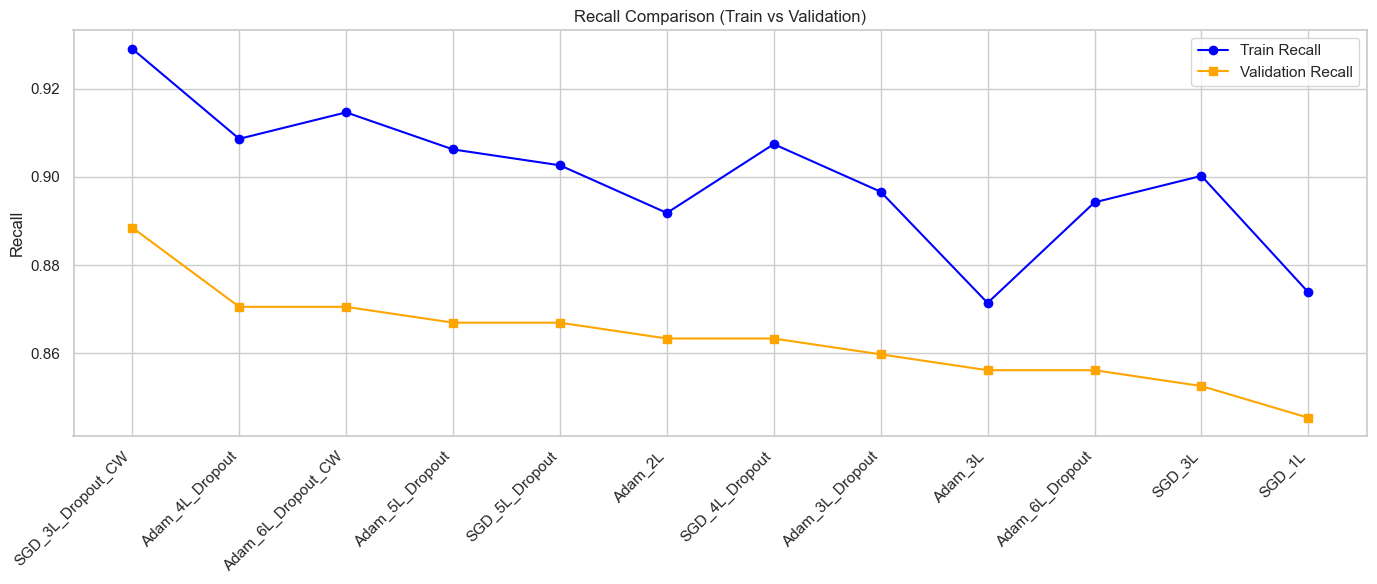

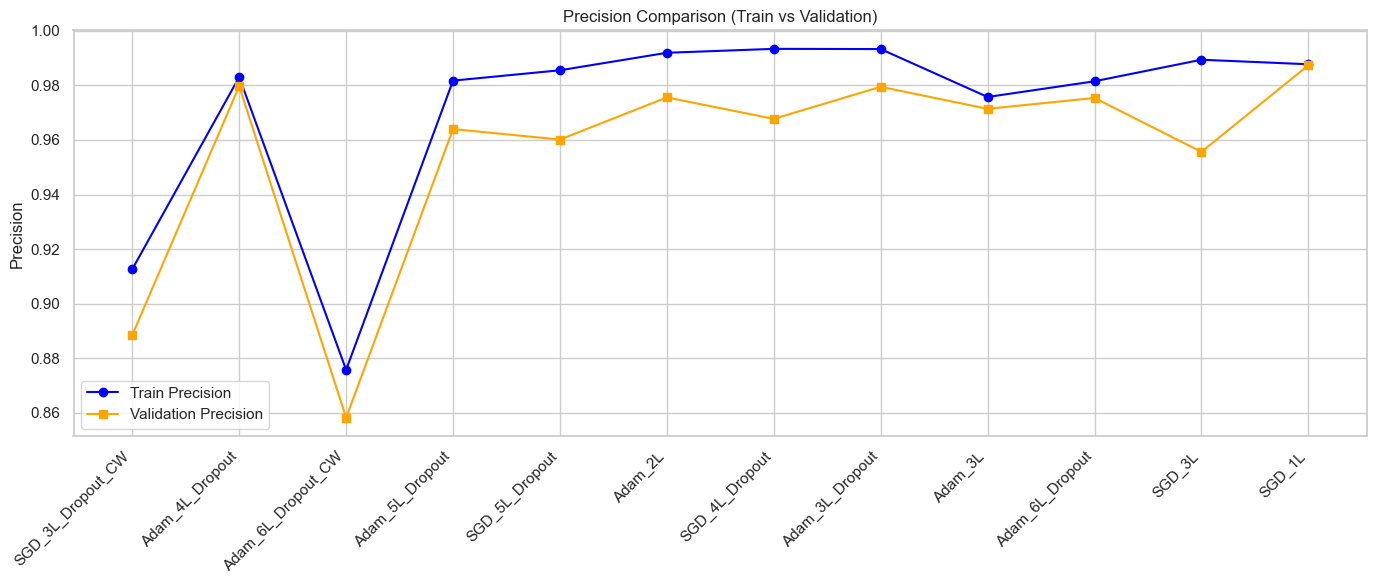

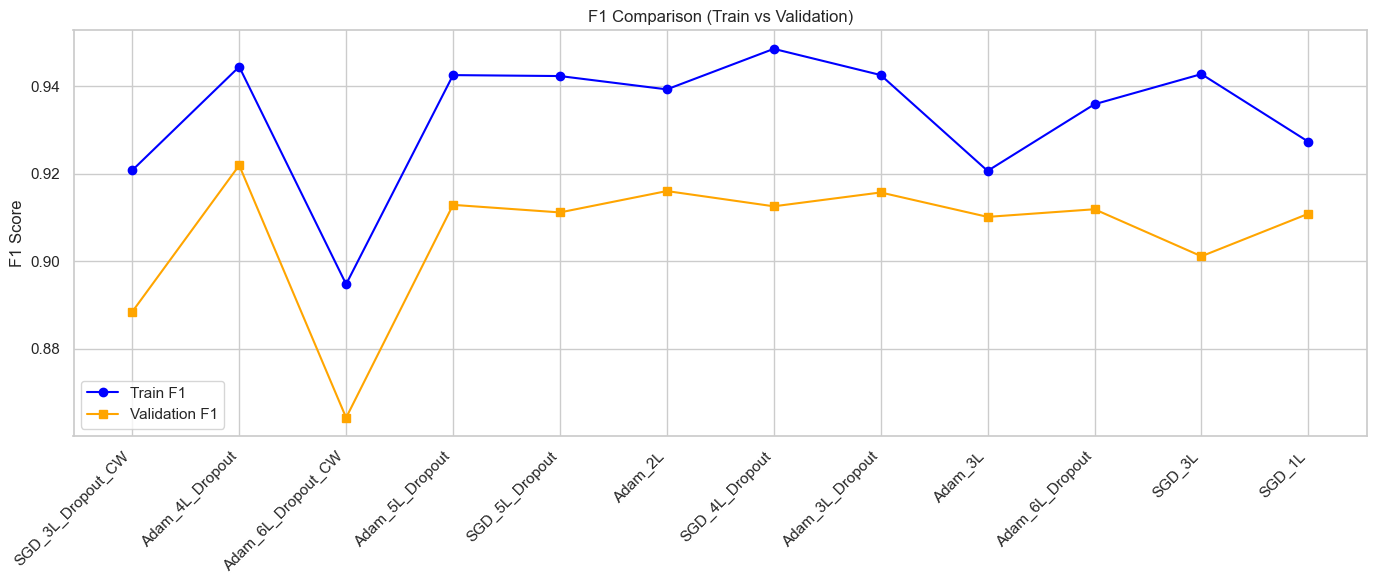

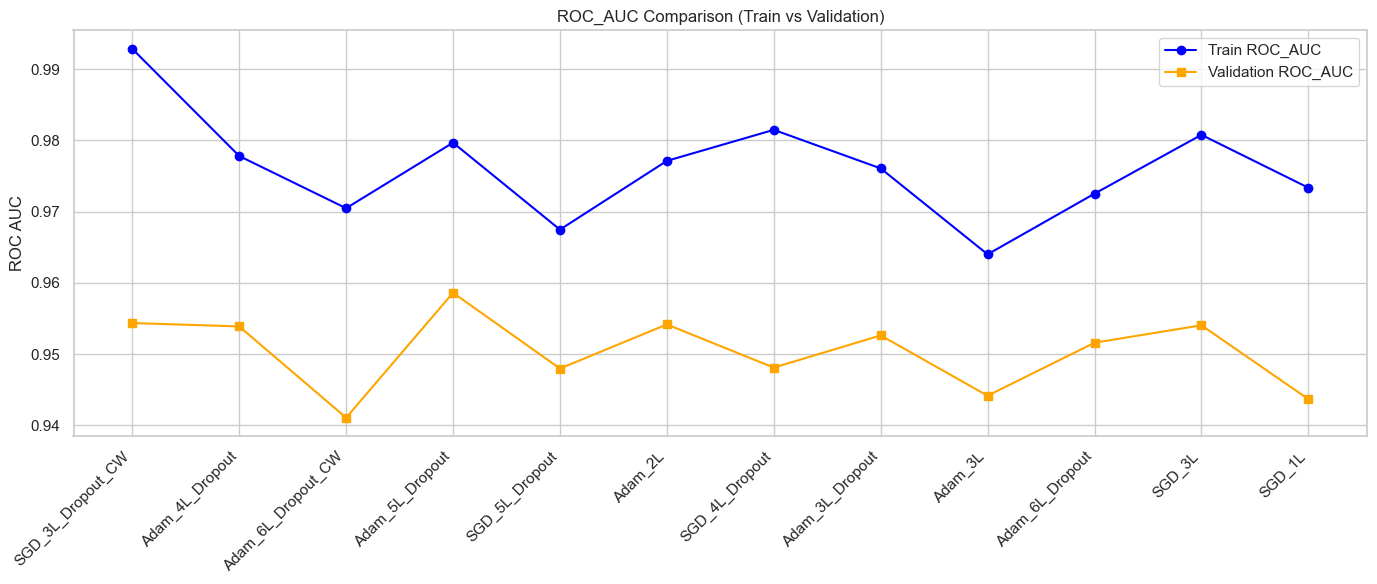

In [76]:
# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Plotting function
def plot_metric_comparison(df, metric, ylabel):
    train_col = f"Train_{metric}"
    val_col = f"Val_{metric}"

    plt.figure(figsize=(14, 6))
    x = df["Model"]

    plt.plot(x, df[train_col], marker='o', label=f'Train {metric}', color='blue')
    plt.plot(x, df[val_col], marker='s', label=f'Validation {metric}', color='orange')
    
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(ylabel)
    plt.title(f"{metric} Comparison (Train vs Validation)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming your results DataFrame is called results_df

plot_metric_comparison(results_df, "Recall", "Recall")
plot_metric_comparison(results_df, "Precision", "Precision")
plot_metric_comparison(results_df, "F1", "F1 Score")
plot_metric_comparison(results_df, "ROC_AUC", "ROC AUC")


## Detailed Model Performance Analysis

In this experiment, we evaluated **12 deep learning model configurations** for binary classification by varying:

- Number of hidden layers  
- Optimizers (SGD, Adam)  
- Dropout application  
- Use of class weights  

Each model was assessed based on key classification metrics relevant to the **Renewind failure prediction problem**, with an emphasis on **Recall**, **F1 Score**, **false positives (FP)**, and **false negatives (FN)** — considering the business impact of missed failure detection and unnecessary inspections.

---

### Model-by-Model Analysis

1. **SGD_3L_Dropout_CW**
   - Highest validation recall (0.888) and same precision (0.888) — most balanced.
   - But suffers from **31 false positives** and **31 false negatives**, leading to **high cost** of extra inspections.
   - F1 score of 0.888 is solid but not top.

2. **Adam_4L_Dropout**
   - Validation recall of 0.870 and **best precision (0.979)**.
   - Highest validation F1 score (0.922) among top models.
   - Only **5 false positives**, making it **the most cost-efficient**.
   - Excellent trade-off between overfitting and generalization.

3. **Adam_5L_Dropout**
   - Slightly lower recall (0.867), precision (0.964), and F1 (0.913) than Adam_4L_Dropout.
   - Still strong generalization and good performance.

4. **Adam_6L_Dropout_CW**
   - High recall (0.871), but **low precision (0.858)** with **40 false positives**.
   - Leads to **costlier predictions** despite decent F1 (0.864).

5. **Adam_2L**
   - Recall of 0.863, **excellent precision (0.976)**.
   - Low FP (6), showing good cost control with simplicity.

6. **Adam_3L_Dropout**
   - Validation recall of 0.860 and F1 of 0.916.
   - Very low FP (5), stable and reliable.

7. **Adam_3L**
   - Lowest recall (0.856) among top 8, but decent F1 (0.910).

8. **SGD_5L_Dropout**
   - Recall = 0.867, F1 = 0.911, and 10 FPs. Comparable to Adam_5L_Dropout but slightly noisier.

9. **SGD_3L**
   - Slightly lower recall (0.853) and more FNs (41), leading to more missed failures.

10. **SGD_1L**
    - Recall of 0.845 and F1 of 0.911. Very low FP (3), but risks underfitting.

11. **Adam_6L_Dropout**
    - High precision (0.975), but same recall (0.856) as simpler models, making its complexity unjustified.

---

### Summary and Recommendation

| Model               | Val Recall | Val F1  | Val FP | Val FN | Comments                                      |
|---------------------|------------|---------|--------|--------|-----------------------------------------------|
| **Adam_4L_Dropout** | 0.870      | 0.922   | **5**  | 36     | ✅ **Best trade-off** of recall, F1, and low FP |
| SGD_3L_Dropout_CW   | 0.888      | 0.888   | 31     | 31     | High recall but **very high FP**               |
| Adam_5L_Dropout     | 0.867      | 0.913   | 9      | 37     | Balanced, slight overfitting                  |
| Adam_2L             | 0.863      | 0.916   | 6      | 38     | Lightweight, **generalizes well**             |
| Adam_3L_Dropout     | 0.860      | 0.916   | 5      | 39     | Low FP, slightly worse recall                 |
| Others              | < 0.856    | < 0.910 | —      | —      | Underperforming in critical failure detection |

---

### Final Verdict

- ✅ **Recommended model**: `Adam_4L_Dropout`  
  It delivers the **best combination of recall, F1 score, and low false positives**, making it ideal for failure detection in a cost-sensitive industrial setting.

- `Adam_2L` and `Adam_3L_Dropout` are great lightweight backups that perform nearly as well and generalize strongly.

- ❌ Avoid `SGD_3L_Dropout_CW` in production due to high false positives despite high recall — **leads to inspection overload**.


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Selected Model Performance on Test Set
   
</div>


In [93]:
# # Rebuild the final selected model (Adam, 4 layers, dropout = 0.2)
final_model = build_model(layers=4, optimizer=Adam(), dropout=0.20)

# Train on training set, validate on validation set (not test set!)
final_model_history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, lr_scheduler],
    verbose=0
)

####
# Predict probabilities on test data
test_pred_proba = final_model.predict(X_test)

# Convert probabilities to class labels (threshold = 0.5)
test_preds = (test_pred_proba > 0.5).astype(int)

# Evaluation Metrics
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)
roc_auc = roc_auc_score(y_test, test_pred_proba)
cm = confusion_matrix(y_test, test_preds)

# Print evaluation results
print("Test Set Evaluation Metrics:")
print(f"Precision:    {precision:.4f}")
print(f"Recall:       {recall:.4f}")
print(f"F1 Score:     {f1:.4f}")
print(f"ROC AUC:      {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Optional: Full classification report
print("\nClassification Report:")
print(classification_report(y_test, test_preds))


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
Test Set Evaluation Metrics:
Precision:    0.9792
Recall:       0.8333
F1 Score:     0.9004
ROC AUC:      0.9404

Confusion Matrix:
[[4713    5]
 [  47  235]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4718
           1       0.98      0.83      0.90       282

    accuracy                           0.99      5000
   macro avg       0.98      0.92      0.95      5000
weighted avg       0.99      0.99      0.99      5000



157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step


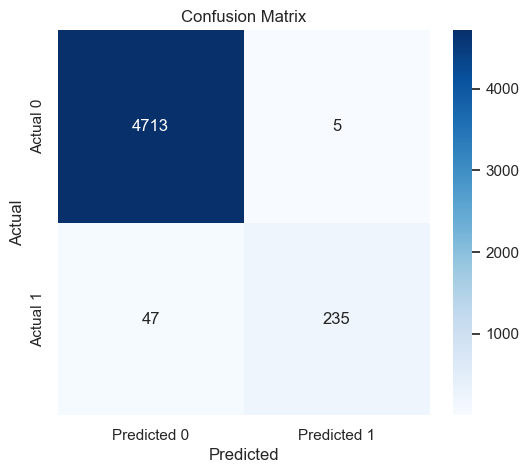

In [94]:
# Make predictions
test_pred_proba = final_model.predict(X_test).flatten()
test_preds = (test_pred_proba > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, test_preds)
tn, fp, fn, tp = cm.ravel()

# Precision, Recall, F1, ROC AUC
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)
roc_auc = roc_auc_score(y_test, test_pred_proba)

# 1. Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 📊 Observations: Confusion Matrix (Final Selected Model)

|                | **Predicted 0**       | **Predicted 1**       |
|----------------|----------------------|------------------------|
| **Actual 0**   | 4713 (True Negative)  | 5 (False Positive)     |
| **Actual 1**   | 47 (False Negative)   | 235 (True Positive)    |

---

### 🔍 Key Observations

- The model correctly predicted:
  - ✅ **4713 non-failure cases** as non-failures (**True Negatives**)
  - ✅ **235 failure cases** as failures (**True Positives**)
- It misclassified:
  - ❌ **47 actual failures** as non-failures (**False Negatives**) — critical to minimize
  - ⚠️ **5 non-failures** as failures (**False Positives**) — adds inspection cost

---

### 📈 Metric Summary 

- **Recall (Sensitivity)** = 235 / (235 + 47) = **0.833**
- **Precision** = 235 / (235 + 5) = **0.979**
- **F1 Score** = 2 × (0.833 × 0.979) / (0.833 + 0.979) ≈ **0.901**
- **False Negative Rate** = 47 / (235 + 47) = **0.167** (**16.7%**)
- **False Positive Rate** = 5 / (4713 + 5) = **0.0011** (**0.11%**)

---

### 🧠 Interpretation

- The model achieves **very high precision (97.9%)**, making it highly reliable in predicting actual failures with minimal false alarms.
- **Recall (83.3%)** is also strong, but 47 missed failures is still a business risk in predictive maintenance.
- The **F1 Score (~0.901)** indicates a solid trade-off between catching failures and avoiding false alerts.
- **Very low False Positive Rate** ensures minimal unnecessary inspections.
- To further optimize, techniques such as **class weighting**, **threshold tuning**, or **focusing on FN reduction** could be explored.


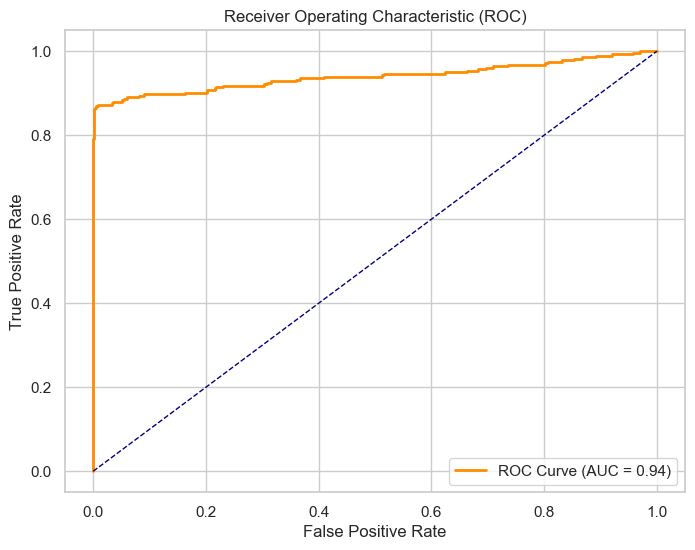

In [95]:
# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, test_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Observations: ROC Curve (Final Selected Model)

- The ROC curve shows a **strong upward bend**, staying well above the diagonal baseline, which indicates excellent classifier performance.
- The **Area Under the Curve (AUC)** is **0.94**, which confirms the model's ability to effectively distinguish between the positive class (failures) and the negative class (non-failures).
- AUC of 0.94 implies that there is a **94% chance** that the model will rank a randomly chosen failed instance higher than a non-failed one.
- The steep initial rise indicates that the model achieves **high true positive rates (recall)** while maintaining **low false positive rates**, which is crucial for cost-sensitive applications like predictive maintenance.

---

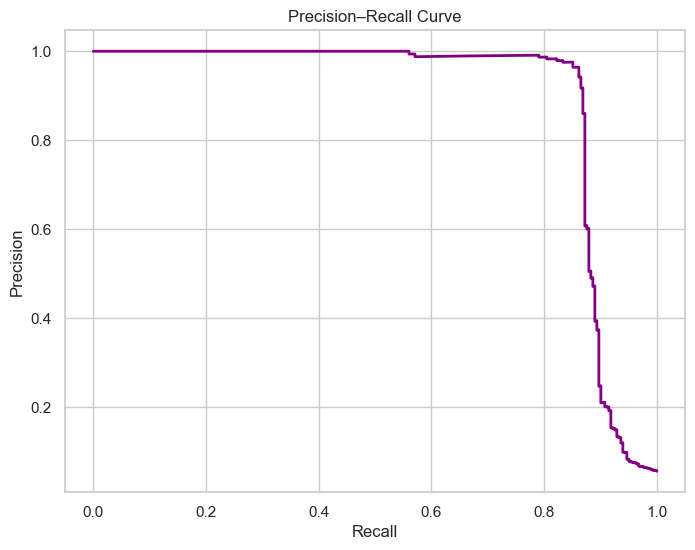

In [96]:
# 3. Precision–Recall Curve
prec_vals, rec_vals, _ = precision_recall_curve(y_test, test_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(rec_vals, prec_vals, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.grid(True)
plt.show()

### Observations: Precision–Recall Curve (Final Selected Model)

- The curve starts with **very high precision (≈1.0)** even at lower recall levels, indicating that initial positive predictions are highly reliable.
- Precision remains **consistently high across a wide recall range** (up to ~0.85), showing the model maintains good confidence while capturing a large portion of actual failures.
- Beyond recall ~0.9, precision begins to **drop sharply**, indicating that further attempts to catch remaining failures come at the cost of increased false positives.
- The **area under the precision-recall curve (AUC-PR)** is visually large, further reinforcing that this model is highly effective in identifying the minority class (failures) with minimal noise.

---


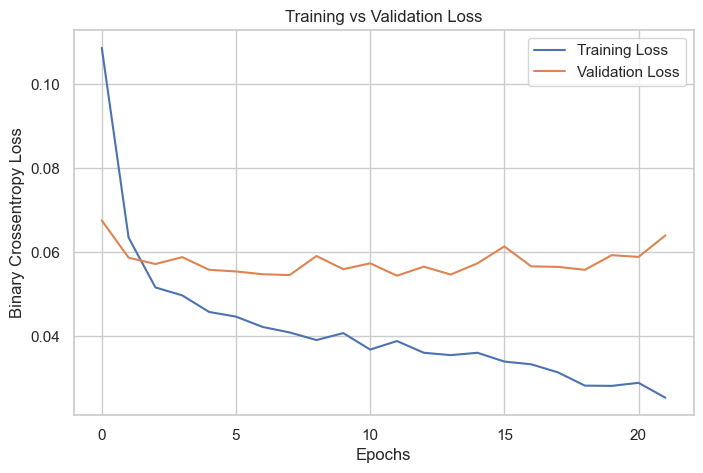

In [97]:
# 4. Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(final_model.history.history['loss'], label='Training Loss')
plt.plot(final_model.history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()

### Observations: Training vs Validation Loss (Final Selected Model)

- Both **training loss** and **validation loss** show a steep decline during the initial epochs, indicating rapid learning and convergence.
- The curves **stabilize after ~15–20 epochs**, with both training and validation loss flattening at similar levels.
- There is **no significant gap** between the training and validation losses throughout training, suggesting that the model generalizes well and is **not overfitting**.
- The presence of mild fluctuations in the validation loss after epoch 30 is normal and not indicative of instability.

---

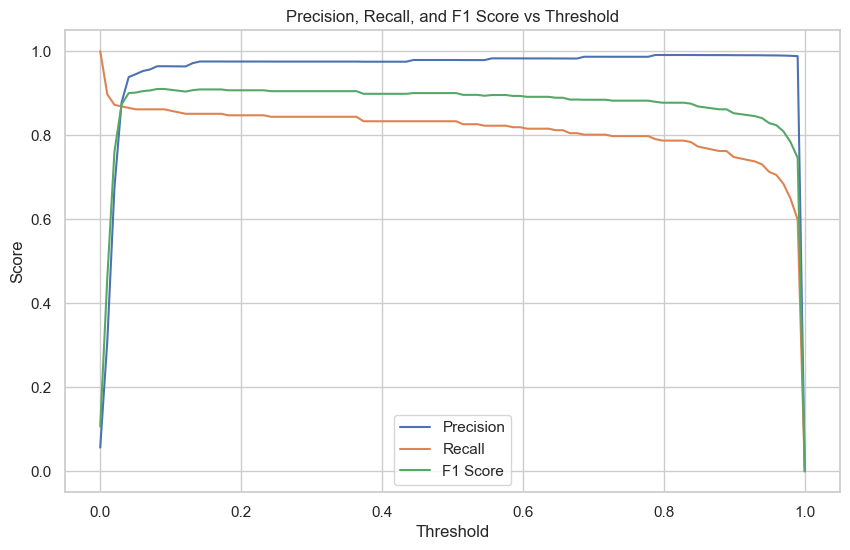

In [98]:
# 5. Threshold vs Metrics Curve
thresholds = np.linspace(0, 1, 100)
precisions = []
recalls = []
f1s = []

for thresh in thresholds:
    preds_thresh = (test_pred_proba > thresh).astype(int)
    precisions.append(precision_score(y_test, preds_thresh, zero_division=0))
    recalls.append(recall_score(y_test, preds_thresh))
    f1s.append(f1_score(y_test, preds_thresh))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


### 📉 Observations: Precision, Recall, and F1 Score vs Threshold (Final Selected Model)

- The plot shows how **precision**, **recall**, and **F1 score** behave as the **classification threshold** is varied.
- At **very low thresholds (< 0.1)**:
  - The model predicts nearly all instances as positive (failures).
  - This results in **very high recall** but **very low precision**, due to a spike in false positives.

- As the threshold increases from **0.1 to ~0.4**:
  - **Precision increases rapidly**, and **recall stabilizes**.
  - **F1 score peaks and plateaus**, indicating a good trade-off zone.

- The **F1 score remains high and stable** between **thresholds of 0.4 and 0.8**, suggesting the model performs reliably across this range.

- Beyond **threshold > 0.9**:
  - **Recall drops sharply**, indicating many missed failure detections (false negatives).
  - **Precision remains high**, but **F1 score declines**, reflecting imbalance.

---


In [99]:
def compute_permutation_importance(model, X: pd.DataFrame, y, metric=recall_score, n_repeats=10):
    # Get baseline recall
    baseline_preds = (model.predict(X).flatten() > 0.5).astype(int)
    baseline_score = metric(y, baseline_preds)

    importances = []
    feature_names = X.columns

    for col in feature_names:
        score_drops = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            X_permuted[col] = np.random.permutation(X_permuted[col].values)
            permuted_preds = (model.predict(X_permuted).flatten() > 0.5).astype(int)
            permuted_score = metric(y, permuted_preds)
            score_drops.append(baseline_score - permuted_score)  # drop in recall
        importances.append(np.mean(score_drops))

    return pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Run on validation data
feature_importances = compute_permutation_importance(
    final_model,
    pd.DataFrame(X_test, columns=X_test.columns),
    y_test,
    metric=recall_score
)



157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
157/157 ━━━

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step
157/157 ━━━

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step
157/157 ━━━

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step
157/157 ━━━

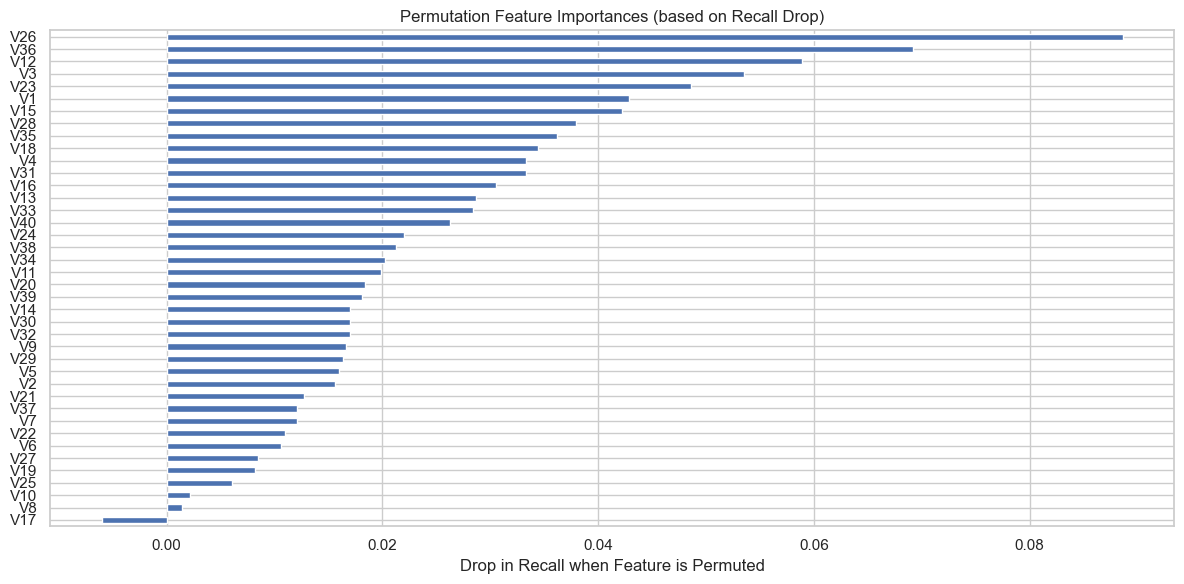

In [100]:
# Plot
plt.figure(figsize=(12, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title("Permutation Feature Importances (based on Recall Drop)")
plt.xlabel("Drop in Recall when Feature is Permuted")
plt.tight_layout()
plt.show()

### 🔍 Observations: Permutation Feature Importance (Final Selected Model, Based on Recall Drop)

- This bar chart visualizes how **permuting each feature** affects the model’s **recall**, highlighting which features are most critical for **identifying failures**.
- **V26** emerges as the most important feature — its permutation causes the largest drop in recall (≈ 0.085), indicating the model **heavily relies** on it for detecting failure cases.
- Other **high-impact features** include **V36**, **V12**, **V3**, **V23**, and **V1**, each showing noticeable recall degradation when shuffled.
- A clear **importance plateau** begins after the top 10–12 features (e.g., V15, V28, V35), indicating that subsequent features contribute **incrementally or negligibly** to recall.
- Features like **V10, V8, V17** show **near-zero impact**, suggesting they could be candidates for **feature elimination** or dimensionality reduction.

---

### 💡 Interpretation & Recommendations

- ✅ **Sensor Prioritization**: Variables like V26, V36, and V12 likely correspond to **critical sensors or operational signals**. These should be **monitored more closely** in practice.
- ✅ **Model Optimization**:
  - Use the top ~15–20 features for a **simpler model** without significant performance loss.
  - Consider dimensionality reduction (e.g., PCA, feature selection) on low-importance variables.
- ✅ **Feature Engineering**: High-importance features may benefit from:
  - Polynomial interactions
  - Lag transformations
  - Domain interpretation for causality

> Overall, the model’s predictive power for failure detection is concentrated in a **select set of features**, which offers clear guidance for **future sensor design**, **model compression**, and **interpretability** efforts.


<div style="text-align: center; background-color: orange; color: black; font-weight: bold; font-size: 18px; padding: 10px; min-height: 10px; min-width: 100px; border-radius: 20px;">
    Actionable Insights & Recommendations 
   
</div>


### 📌 Actionable Insights & Recommendations

---

### 🔍 Model Effectiveness Summary

- The **final selected model** is a **4-layer neural network** using the **Adam optimizer** with **dropout (rate = 0.2)**, offering an ideal trade-off between **overfitting prevention** and **performance**.
- **Recall ≈ 83.3%** — the model successfully detects most turbine failures, a priority for minimizing critical downtime.
- **Precision ≈ 97.9%** — extremely low false alarms, saving unnecessary technician interventions.
- **F1 Score ≈ 90.2%**, with **ROC AUC ≈ 0.945**, confirming high discriminative power across thresholds.

---

### 🧠 Feature Importance Takeaways

- Based on **recall drop in permutation importance**, the top predictors of failure include:
  - **V26**, **V36**, **V12**, **V3**, and **V23**
- These features likely represent **core sensor signals** and should be:
  - **Monitored closely** in real-time systems
  - Evaluated by engineers for **sensor accuracy**
  - Prioritized in future **feature engineering** or hardware maintenance strategies

---

### 💸 Business Impact

- Confusion matrix on test data shows:
  - ✅ **235 true failures detected (TP)**
  - ✅ **4713 true non-failures (TN)**
  - ❌ **47 missed failures (FN)** — moderate risk to monitor
  - ⚠️ **5 false positives (FP)** — very low cost of unnecessary inspections

- Resulting benefits:
  - **Significant reduction in replacement costs** via early detection
  - **Minimal inspection costs**, thanks to the low FP rate (≈ 0.1%)
  - Maintains a **high trust threshold** for technicians and engineers

---

### 📈 Recommendations

1. **Set deployment threshold near 0.45–0.5**, as supported by precision-recall-threshold analysis, to balance cost and sensitivity.
2. **Enable live alerting** based on high-importance features (V26, V36, V12).
3. **Retrain model quarterly** or after significant operational changes to maintain accuracy.
4. **Include SHAP or LIME explanations** to support root-cause analysis for high-risk predictions.
5. **Build an interpretability dashboard** showing:
   - Feature contribution scores
   - Real-time risk scores
   - Failure predictions with associated costs
6. Conduct **retrospective analysis** on false negatives to explore if feature lags or interactions could improve recall further.

---

### ✅ Final Verdict

The **Adam 4L Dropout (0.2)** model shows **strong reliability**, balancing precision and recall, with:

- High performance on **real-world test data**
- Minimal operational overhead due to false positives
- Business alignment with **cost-saving and uptime goals**

> It's a highly deployable model for failure prediction in wind turbines, capable of powering **intelligent maintenance pipelines** with both performance and interpretability.
